In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from numpy import unique
from numpy import where
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib as mp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from tqdm import tqdm
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from numpy import argsort
from keras.wrappers.scikit_learn import KerasRegressor

##Data Reading

In [2]:
# df1 = pd.read_csv('/content/data/AO.txt',delim_whitespace=True,header=None)
# df2 = pd.read_csv('/content/data/EPO.txt',delim_whitespace=True,header=None)
# df3 = pd.read_csv('/content/data/NAO.txt',delim_whitespace=True,header=None)
# df4 = pd.read_csv('/content/data/NINO1+2.txt',delim_whitespace=True,header=None)
# df5 = pd.read_csv('/content/data/NINO3.txt',delim_whitespace=True,header=None)
# df6 = pd.read_csv('/content/data/NINO34.txt',delim_whitespace=True,header=None)
# df7 = pd.read_csv('/content/data/NINO4.txt',delim_whitespace=True,header=None)
# df8 = pd.read_csv('/content/data/PNA.txt',delim_whitespace=True,header=None)
# df9 = pd.read_csv('/content/data/SOI.txt',delim_whitespace=True)
# df10 = pd.read_csv('/content/data/WPO.txt',delim_whitespace=True,header=None)
# bhadra_data = pd.read_excel('/content/data/Bhadara_data.xlsx')

df1 = pd.read_csv('data/AO.txt',delim_whitespace=True,header=None)
df2 = pd.read_csv('data/EPO.txt',delim_whitespace=True,header=None)
df3 = pd.read_csv('data/NAO.txt',delim_whitespace=True,header=None)
df4 = pd.read_csv('data/NINO1+2.txt',delim_whitespace=True,header=None)
df5 = pd.read_csv('data/NINO3.txt',delim_whitespace=True,header=None)
df6 = pd.read_csv('data/NINO34.txt',delim_whitespace=True,header=None)
df7 = pd.read_csv('data/NINO4.txt',delim_whitespace=True,header=None)
df8 = pd.read_csv('data/PNA.txt',delim_whitespace=True,header=None)
df9 = pd.read_csv('data/SOI.txt',delim_whitespace=True)
df10 = pd.read_csv('data/WPO.txt',delim_whitespace=True,header=None)
bhadra_data = pd.read_excel('data/Bhadara_data.xlsx')

## Rainfall Data Extraction

In [3]:
attigundi_df = pd.read_csv('data/Attigundi.xls',header=None)
balehonnur_df = pd.read_csv('data/Balehonnur.xls',header=None)
basarikatte_df = pd.read_csv('data/Basarikatte.xls',header=None)
kalasa_df = pd.read_csv('data/Kalasa.xls',header=None)
malandur_df = pd.read_csv('data/Malandur.xls',header=None)
narsimharajapura_df = pd.read_csv('data/Narsimharajapura.xls',header=None)

In [4]:
attigundi = attigundi_df.iloc[47085:53554].copy()
balehonnur = balehonnur_df.iloc[47085:53554].copy()
basarikatte = basarikatte_df.iloc[45174:51643].copy()
kalasa = kalasa_df.iloc[47085:53554].copy()
malandur = malandur_df.iloc[47085:53554].copy()
narsimharajapura = narsimharajapura_df.iloc[47085:53554].copy()

In [5]:
attigundi.head(10)

,0
47085,<LocationName>Attigundi</LocationName>
47086,<Year>2004</Year>
47087,<Month>6</Month>
47088,<Day>1</Day>
47089,<Data>14.7 </Data>
47090,</Attigundi>
47091,<Attigundi>
47092,<LocationName>Attigundi</LocationName>
47093,<Year>2004</Year>
47094,<Month>6</Month>


In [7]:
i = 4
attigundi_lst = []
while i < attigundi.shape[0]:
  st = attigundi.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  attigundi_lst.append(float(st.strip()))
  i = i+7
len(attigundi_lst)

924

In [8]:
i = 4
balehonnur_lst = []
while i < balehonnur.shape[0]:
  st = balehonnur.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  balehonnur_lst.append(float(st.strip()))
  i = i+7
len(balehonnur_lst)

924

In [9]:
i = 4
basarikatte_lst = []
while i < basarikatte.shape[0]:
  st = basarikatte.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  basarikatte_lst.append(float(st.strip()))
  i = i+7
len(basarikatte_lst)

924

In [10]:
i = 4
kalasa_lst = []
while i < kalasa.shape[0]:
  st = kalasa.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  kalasa_lst.append(float(st.strip()))
  i = i+7
len(kalasa_lst)

924

In [11]:
i = 4
malandur_lst = []
while i < malandur.shape[0]:
  st = malandur.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  malandur_lst.append(float(st.strip()))
  i = i+7
len(malandur_lst)

924

In [12]:
i = 4
narsimharajapura_lst = []
while i < narsimharajapura.shape[0]:
  st = narsimharajapura.iloc[i,0]
  st = st.replace('<Data>','')
  st = st.replace('</Data>','')
  narsimharajapura_lst.append(float(st.strip()))
  i = i+7
len(narsimharajapura_lst)

924

In [13]:
precipitation = []
for i in range(len(attigundi_lst)):
  value = (+attigundi_lst[i]+balehonnur_lst[i]+basarikatte_lst[i]+kalasa_lst[i]+malandur_lst[i]+narsimharajapura_lst[i])/6
  precipitation.append(value)
print(len(precipitation))

924


## Data Extraction of Common Timeline

In [14]:
ao_df = df1.iloc[48729:49653].copy()
epo_df = df2.iloc[20606:21530].copy()
nao_df = df3.iloc[20606:21530].copy()
nino12_df = df4.iloc[8309:9233].copy()
nino3_df = df5.iloc[8309:9233].copy()
nino34_df = df6.iloc[8309:9233].copy()
nino4_df = df7.iloc[8309:].copy()
pna_df = df8.iloc[20606:21530].copy()
soi_df = df9.iloc[4744:5668].copy()
wpo_df = df10.iloc[20606:21530].copy()

In [15]:
ao_df

,0,1,2,3
48729,2004,6,1,-0.570193
48730,2004,6,2,-0.641711
48731,2004,6,3,-0.358915
48732,2004,6,4,-0.190428
48733,2004,6,5,-0.067059
...,...,...,...,...
49648,2006,12,7,0.902608
49649,2006,12,8,1.151850
49650,2006,12,9,1.485700
49651,2006,12,10,2.632020


In [16]:
df1.iloc[48729:49653]

,0,1,2,3
48729,2004,6,1,-0.570193
48730,2004,6,2,-0.641711
48731,2004,6,3,-0.358915
48732,2004,6,4,-0.190428
48733,2004,6,5,-0.067059
...,...,...,...,...
49648,2006,12,7,0.902608
49649,2006,12,8,1.151850
49650,2006,12,9,1.485700
49651,2006,12,10,2.632020


In [17]:
epo_df

,0,1,2,3
20606,2004,6,1,58.25
20607,2004,6,2,52.82
20608,2004,6,3,12.31
20609,2004,6,4,14.17
20610,2004,6,5,39.01
...,...,...,...,...
21525,2006,12,7,24.21
21526,2006,12,8,87.07
21527,2006,12,9,94.97
21528,2006,12,10,140.47


In [18]:
# print(ao_df.shape)
# print(epo_df.shape)
# print(nao_df.shape)
# print(nino12_df.shape)
# print(nino3_df.shape)
# print(nino34_df.shape)
# print(nino4_df.shape)
# print(pna_df.shape)
# print(soi_df.shape)
# print(wpo_df.shape)

In [19]:
ao = pd.DataFrame()
epo = pd.DataFrame()
nao = pd.DataFrame()
nino12 = pd.DataFrame()
nino3 = pd.DataFrame()
nino34 = pd.DataFrame()
nino4 = pd.DataFrame()
pna = pd.DataFrame()
soi = pd.DataFrame()
wpo = pd.DataFrame()
bhadra_inflow = pd.DataFrame()
bhadra_evaporation = pd.DataFrame()
bhadra_precipitation = pd.DataFrame()
seasonality = pd.DataFrame()

In [20]:
epo_df

,0,1,2,3
20606,2004,6,1,58.25
20607,2004,6,2,52.82
20608,2004,6,3,12.31
20609,2004,6,4,14.17
20610,2004,6,5,39.01
...,...,...,...,...
21525,2006,12,7,24.21
21526,2006,12,8,87.07
21527,2006,12,9,94.97
21528,2006,12,10,140.47


In [21]:
ao['VALUE'] = ao_df.iloc[:,3]
epo['VALUE'] = epo_df.iloc[:,3]
nao['VALUE'] = nao_df.iloc[:,3]
nino12['VALUE'] = nino12_df.iloc[:,1]
nino3['VALUE'] = nino3_df.iloc[:,1]
nino34['VALUE'] = nino34_df.iloc[:,1]
nino4['VALUE'] = nino4_df.iloc[:,1]
pna['VALUE'] = pna_df.iloc[:,3]
soi['VALUE'] = soi_df['SOI'].copy()
wpo['VALUE'] = wpo_df.iloc[:,3]
bhadra_inflow['VALUE'] = bhadra_data['InFlow'].copy()
bhadra_evaporation['VALUE'] = bhadra_data['Evaporation'].copy()
bhadra_precipitation['VALUE'] = precipitation
seasonality['VALUE'] = epo_df.iloc[:,1]

In [24]:
nao

,VALUE
20606,-53.82
20607,-17.91
20608,5.83
20609,4.78
20610,1.17
...,...
21525,145.10
21526,100.50
21527,156.40
21528,284.54


In [25]:
seasonality.shape

(924, 1)

In [26]:
# print unique values in seasonality
print(unique(seasonality['VALUE']))

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [26]:
# bhadra_precipitation.to_csv('bhadra_preci.csv')

##Checking if Null Value is Present in DataFrame

In [27]:
ao.isna().sum()

VALUE    0
dtype: int64

In [28]:
epo.isna().sum()

VALUE    0
dtype: int64

In [29]:
nao.isna().sum()

VALUE    0
dtype: int64

In [30]:
nino12.isna().sum()

VALUE    0
dtype: int64

In [31]:
nino3.isna().sum()

VALUE    0
dtype: int64

In [32]:
nino34.isna().sum()

VALUE    0
dtype: int64

In [33]:
nino4.isna().sum()

VALUE    0
dtype: int64

In [34]:
pna.isna().sum()

VALUE    0
dtype: int64

In [35]:
soi.isna().sum()

VALUE    0
dtype: int64

In [36]:
wpo.isna().sum()

VALUE    0
dtype: int64

In [37]:
bhadra_inflow.isna().sum()

VALUE    0
dtype: int64

In [38]:
bhadra_evaporation.isna().sum()

VALUE    0
dtype: int64

In [39]:
bhadra_precipitation.isna().sum()

VALUE    0
dtype: int64

##Convert Object Type Data to Float

In [40]:
def converttofloat(s):
  count = 0
  s = str(s)
  v = float(s.replace(',',''))
  if v < 0:
    count +=1
    return np.nan
  else:
    return v

In [41]:
bhadra_inflow['VALUE'] = bhadra_inflow['VALUE'].apply(converttofloat)

In [42]:
bhadra_evaporation['VALUE'] = bhadra_evaporation['VALUE'].apply(converttofloat)

In [43]:
seasonality['VALUE'] = seasonality['VALUE'].apply(converttofloat)

##Unit Conversion

In [44]:
def mcfttom3s(value):
  value = (value*28316.8466)/(24*60*60*1.0)
  return value

In [45]:
bhadra_inflow['VALUE'] = bhadra_inflow['VALUE'].apply(mcfttom3s)
bhadra_evaporation['VALUE'] = bhadra_evaporation['VALUE'].apply(mcfttom3s)

##Data Visualization

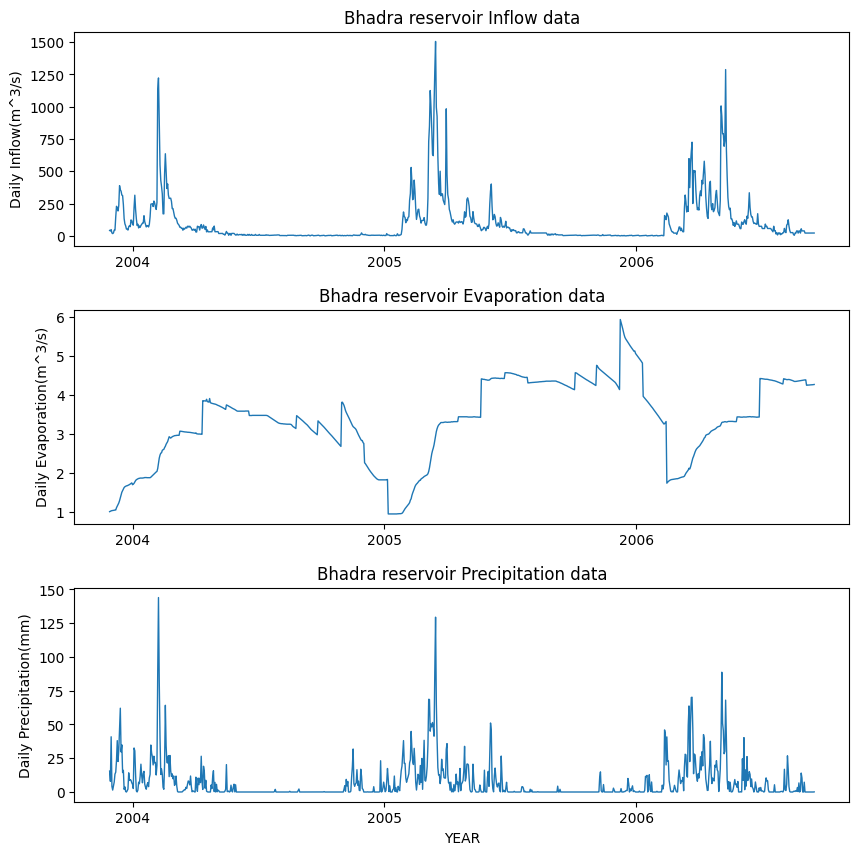

In [46]:
a = list(bhadra_inflow['VALUE'])
b = list(bhadra_evaporation['VALUE'])
c = list(bhadra_precipitation['VALUE'])
fig,ax = plt.subplots(3,1,figsize=(10,10))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(a,linewidth=1)
ax[0].set_title('Bhadra reservoir Inflow data')
ax[0].set_ylabel('Daily Inflow(m^3/s)')
ax[1].plot(b, linewidth=1)
ax[1].set_title('Bhadra reservoir Evaporation data')
ax[1].set_ylabel('Daily Evaporation(m^3/s)')
ax[2].plot(c,linewidth=1)
ax[2].set_title('Bhadra reservoir Precipitation data')
ax[2].set_ylabel('Daily Precipitation(mm)')
plt.xlabel('YEAR')

fig.subplots_adjust(wspace=0.1, hspace=0.3)
plt.savefig("Bhadra.png")
plt.show()

In [47]:
bhadra = pd.DataFrame({'inflow':a,'evaporation':b,'precipitation':c})
bhadra.to_csv('bhadra.csv')

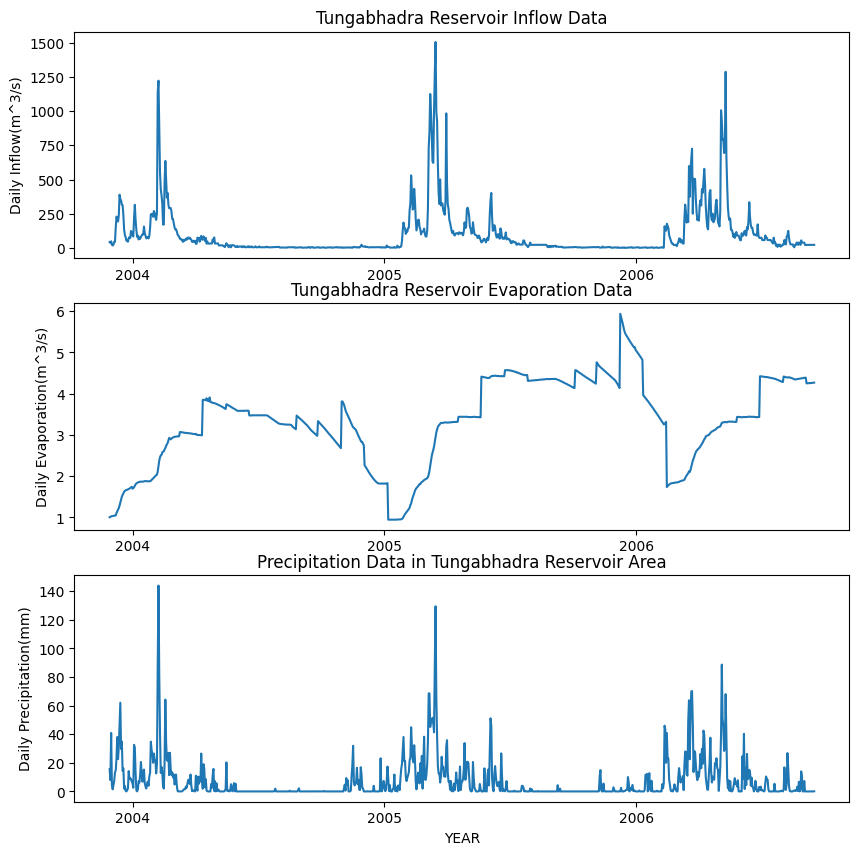

In [48]:
a = list(bhadra_inflow['VALUE'])
b = list(bhadra_evaporation['VALUE'])
c = list(bhadra_precipitation['VALUE'])
fig,ax = plt.subplots(3,1,figsize=(10,10))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(a)
ax[0].set_title('Tungabhadra Reservoir Inflow Data')
ax[0].set_ylabel('Daily Inflow(m^3/s)')
ax[1].plot(b)
ax[1].set_title('Tungabhadra Reservoir Evaporation Data')
ax[1].set_ylabel('Daily Evaporation(m^3/s)')
ax[2].plot(c)
ax[2].set_title('Precipitation Data in Tungabhadra Reservoir Area')
ax[2].set_ylabel('Daily Precipitation(mm)')
plt.xlabel('YEAR')
plt.savefig('test.png',dpi=300)
plt.show()

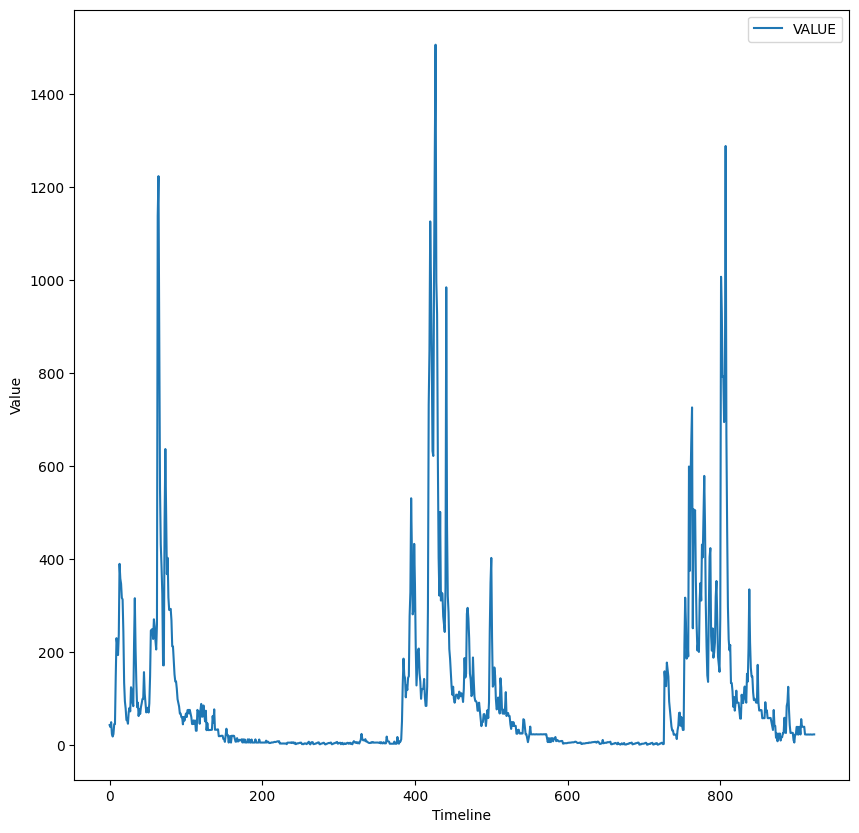

In [49]:
bhadra_inflow.plot(figsize = (10,10))
plt.ylabel('Value')
plt.xlabel('Timeline')
plt.show()

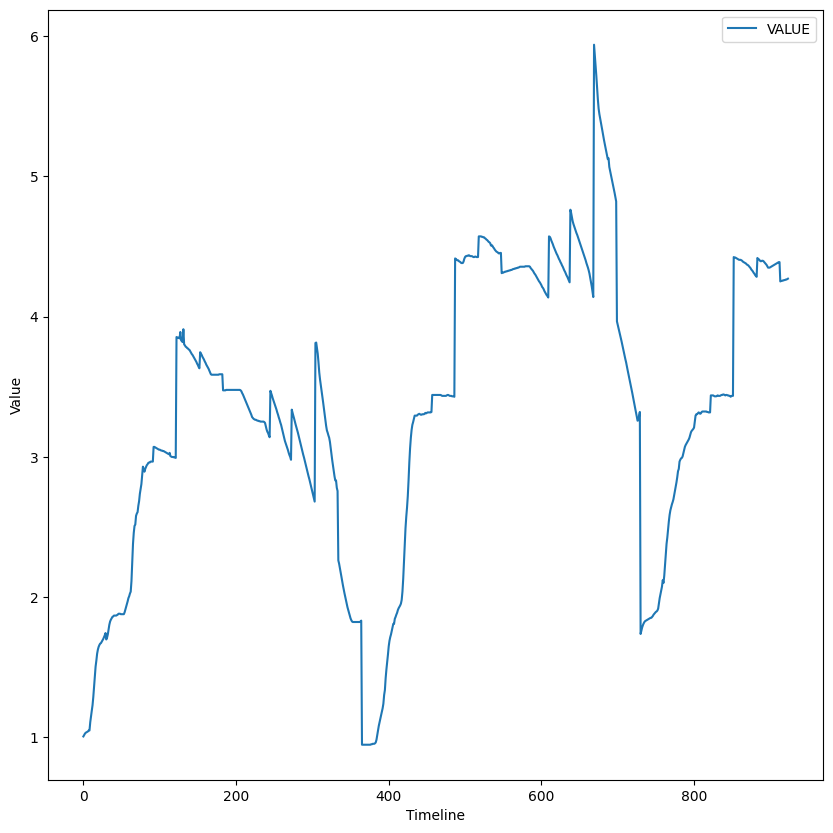

In [50]:
bhadra_evaporation.plot(figsize=(10,10))
plt.xlabel('Timeline')
plt.ylabel('Value')
plt.show()

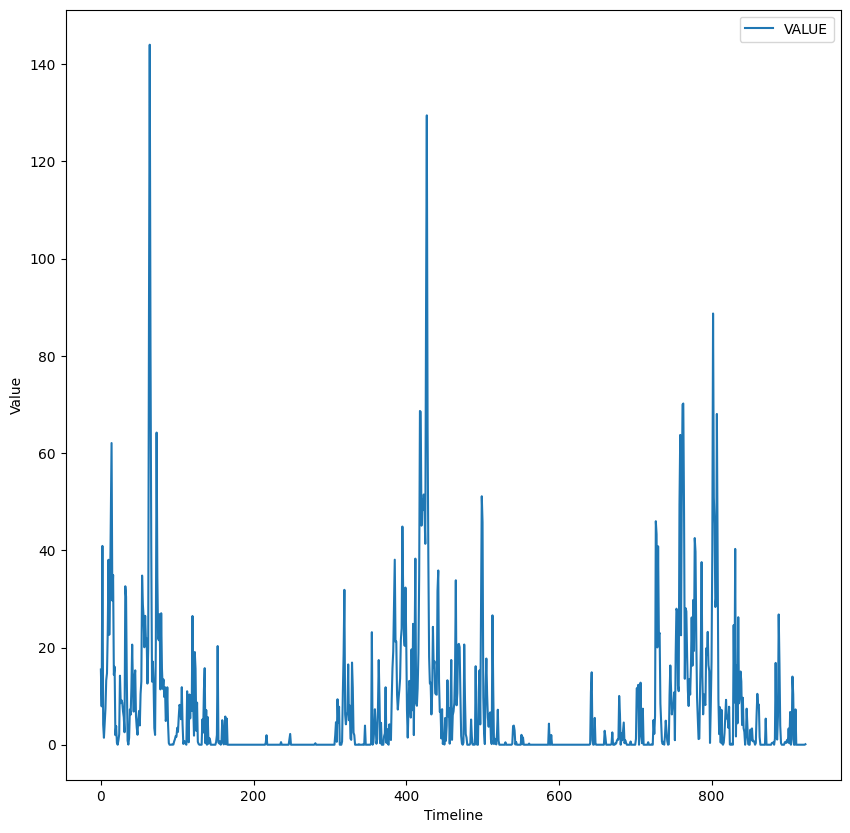

In [50]:
bhadra_precipitation.plot(figsize=(10,10))
plt.xlabel('Timeline')
plt.ylabel('Value')
plt.show()

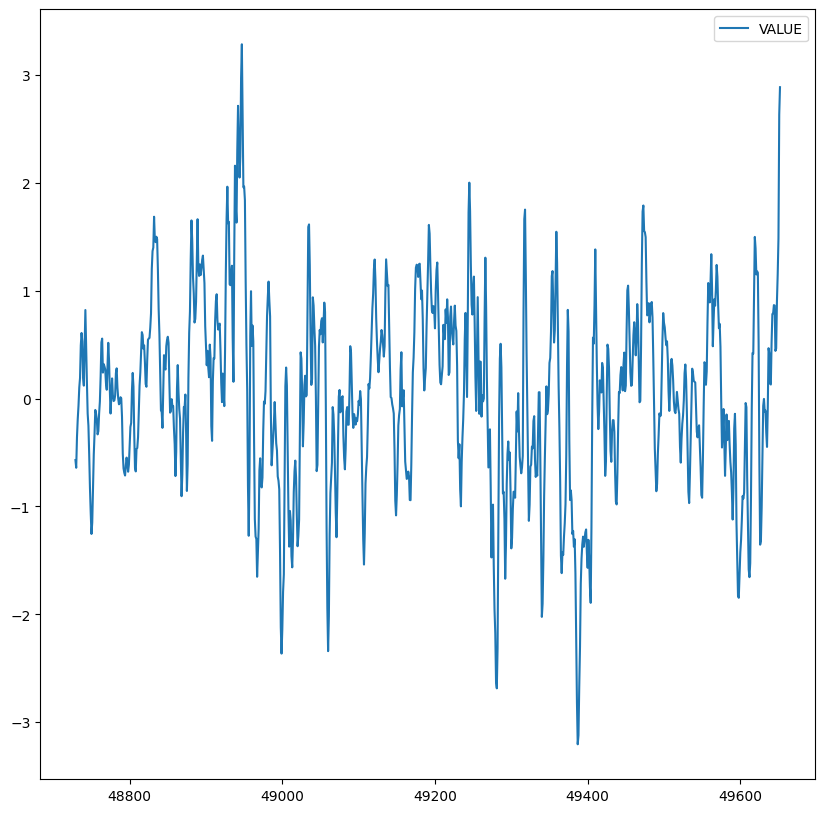

In [51]:
ao.plot(figsize=(10,10))
plt.show()

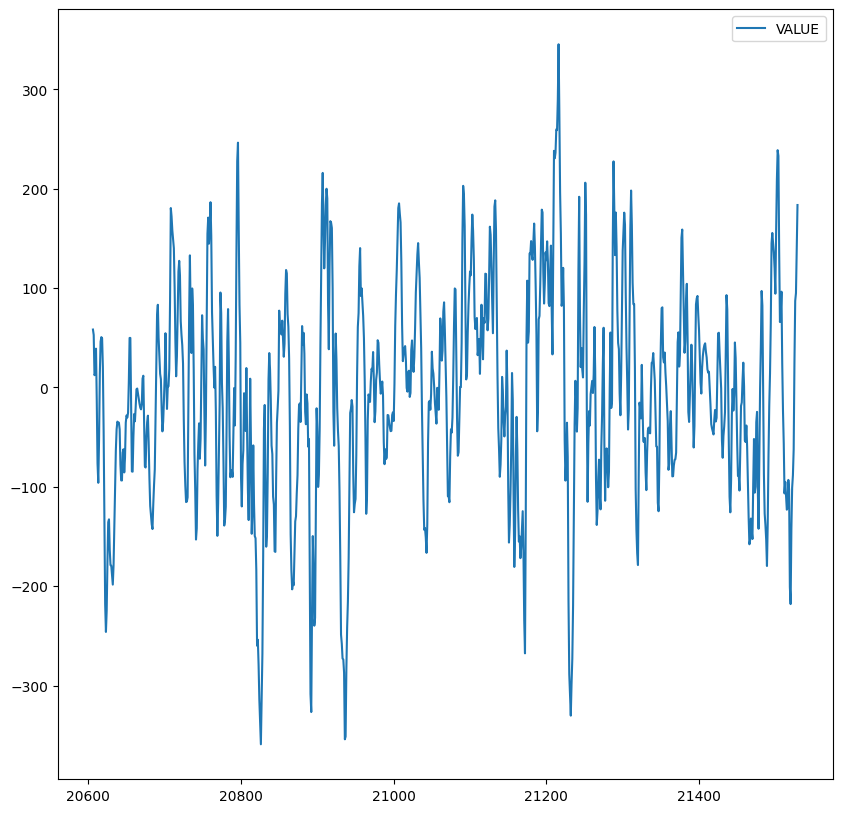

In [52]:
epo.plot(figsize=(10,10))
plt.show()

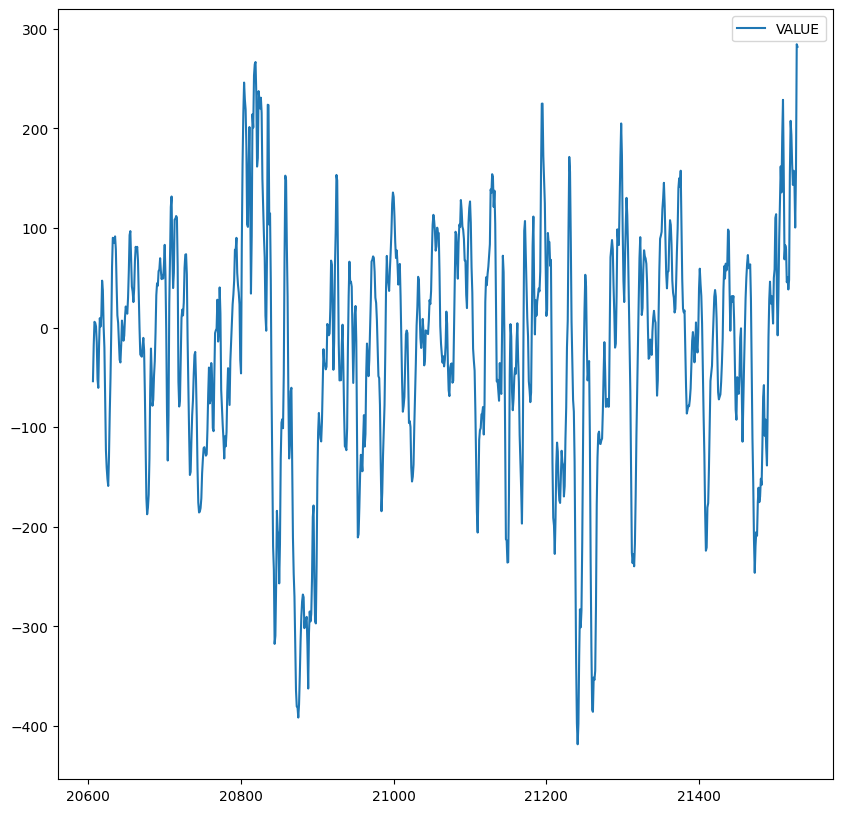

In [53]:
nao.plot(figsize=(10,10))
plt.show()

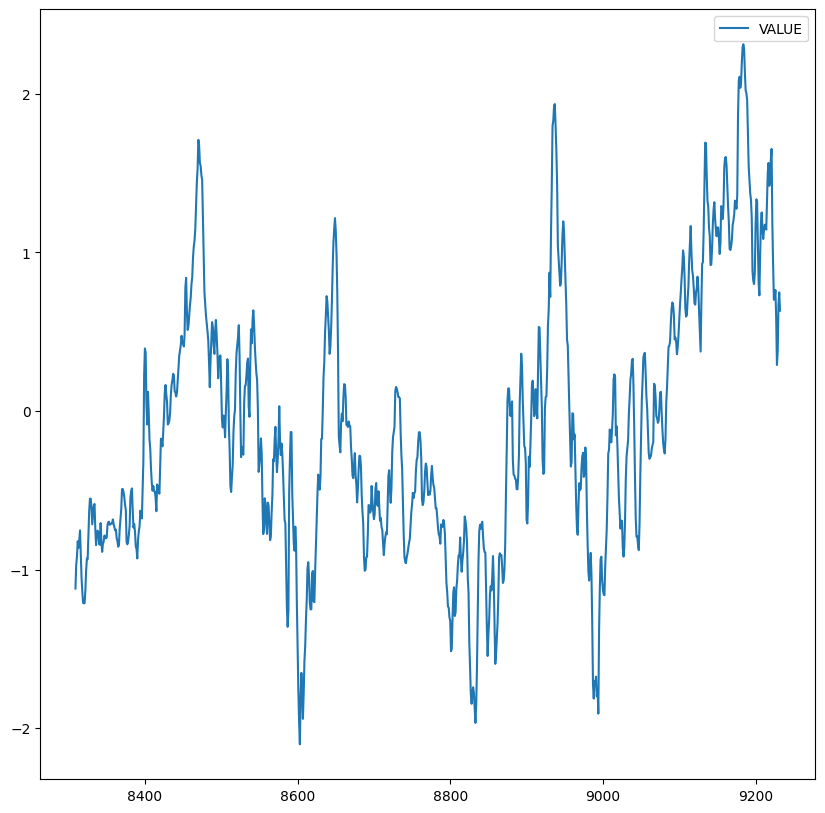

In [54]:
nino12.plot(figsize=(10,10))
plt.show()

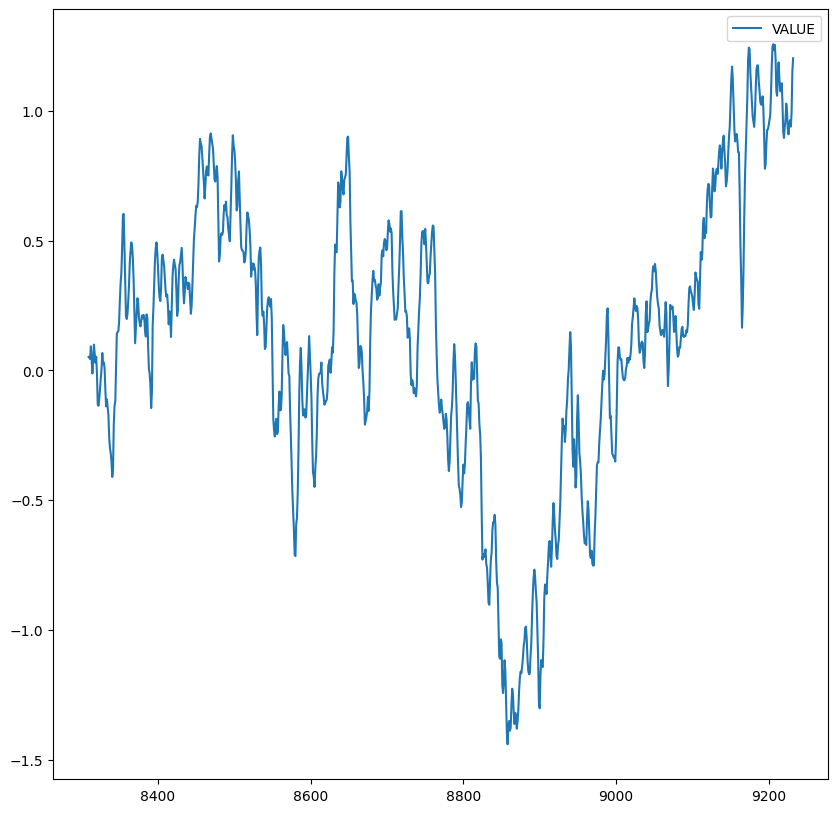

In [55]:
nino3.plot(figsize=(10,10))
plt.show()

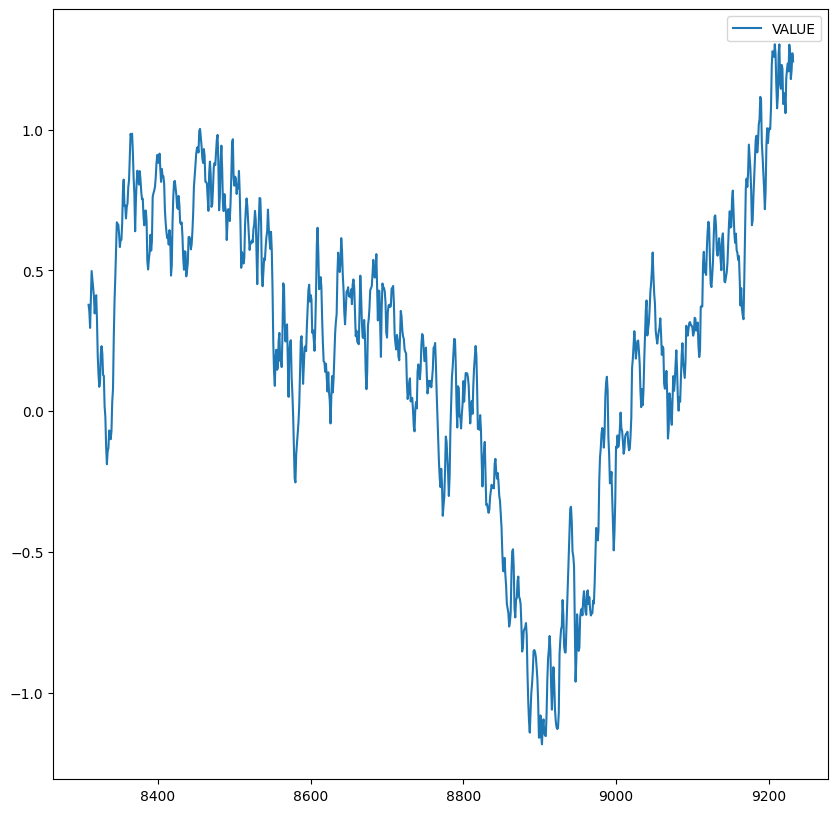

In [57]:
nino34.plot(figsize=(10,10))
plt.show()

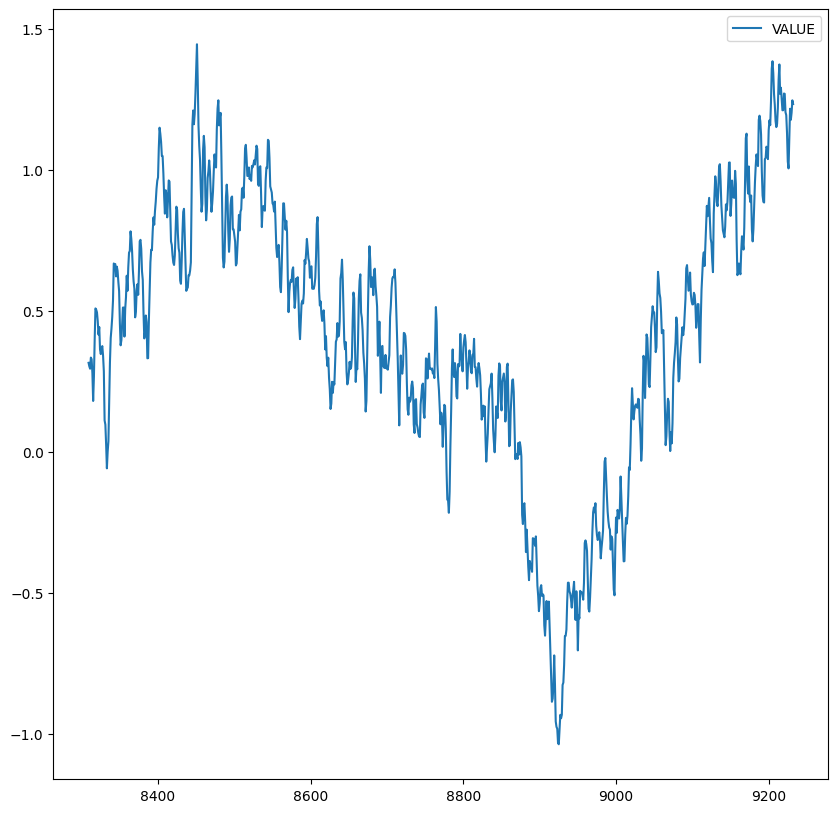

In [56]:
nino4.plot(figsize=(10,10))
plt.show()

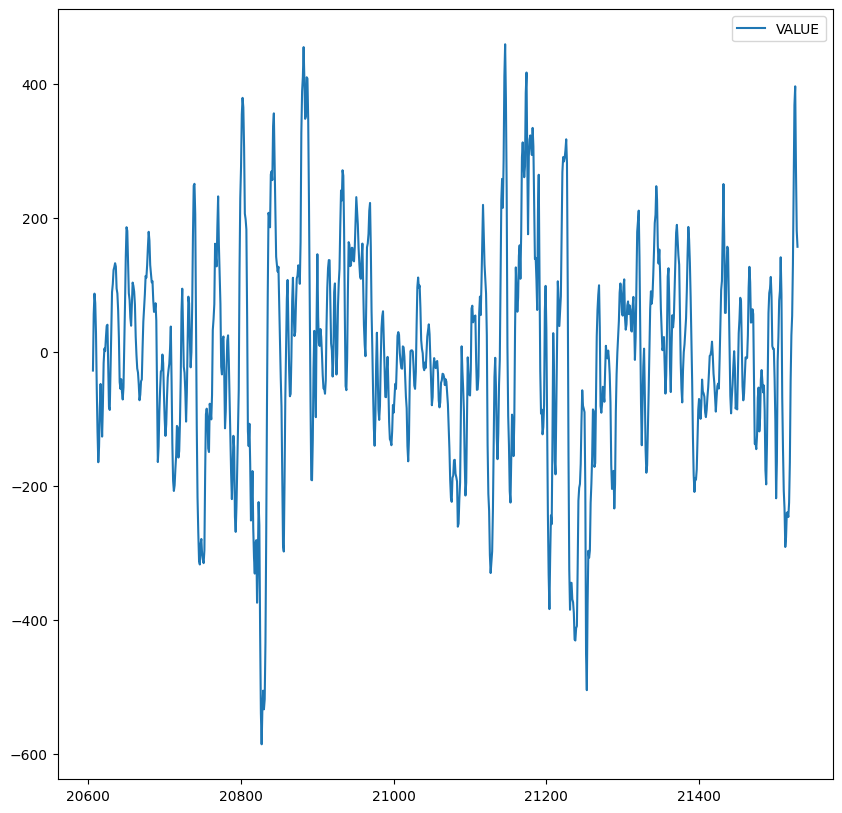

In [57]:
pna.plot(figsize=(10,10))
plt.show()

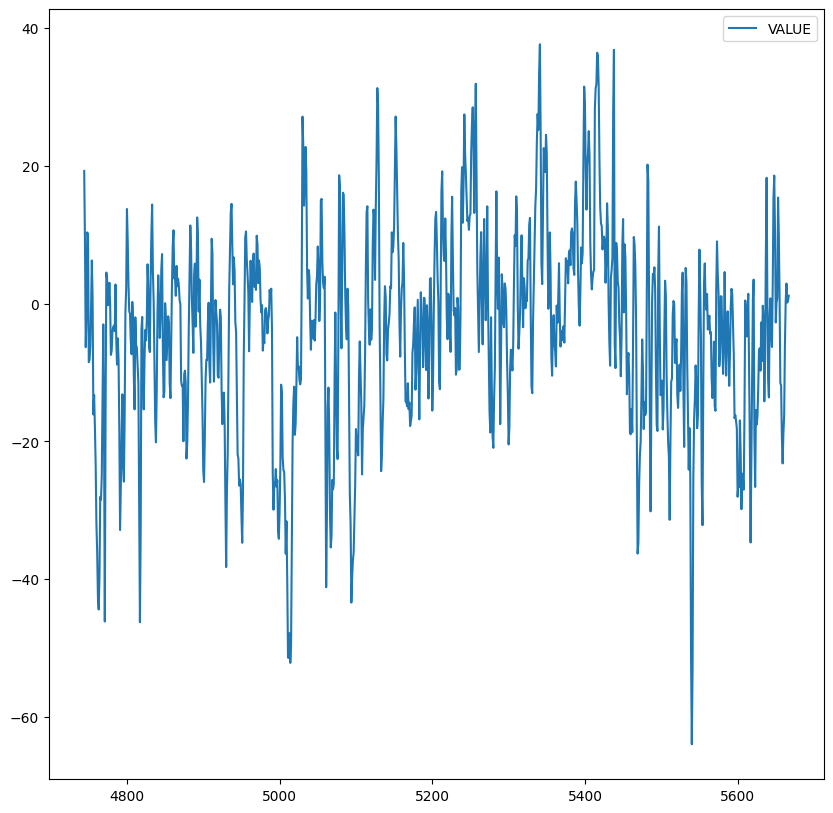

In [58]:
soi.plot(figsize=(10,10))
plt.show()

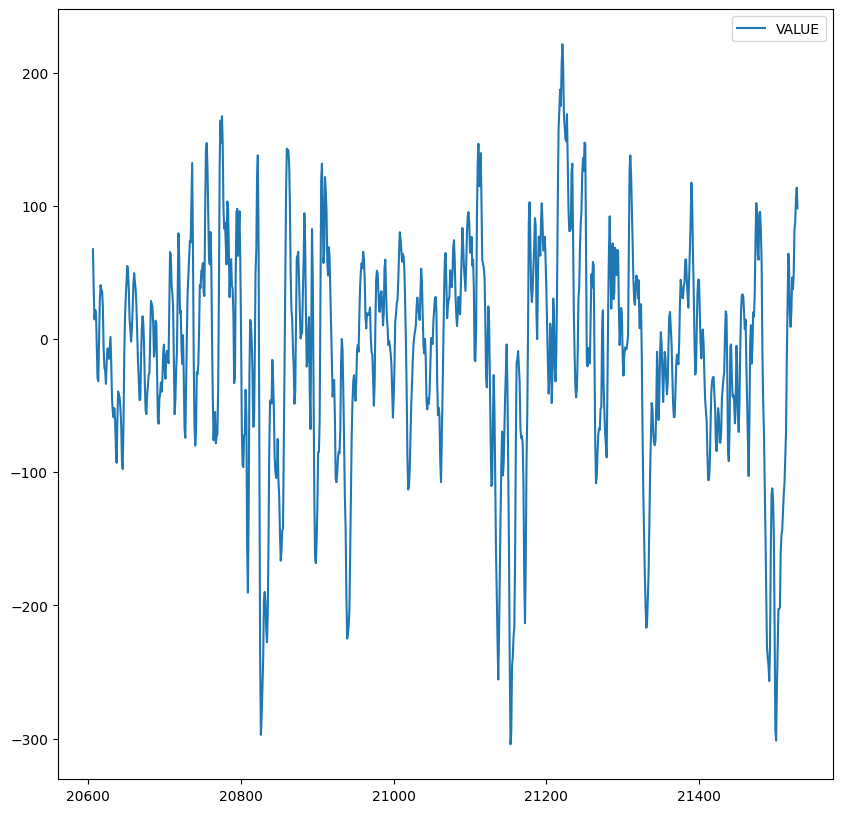

In [59]:
wpo.plot(figsize=(10,10))
plt.show()

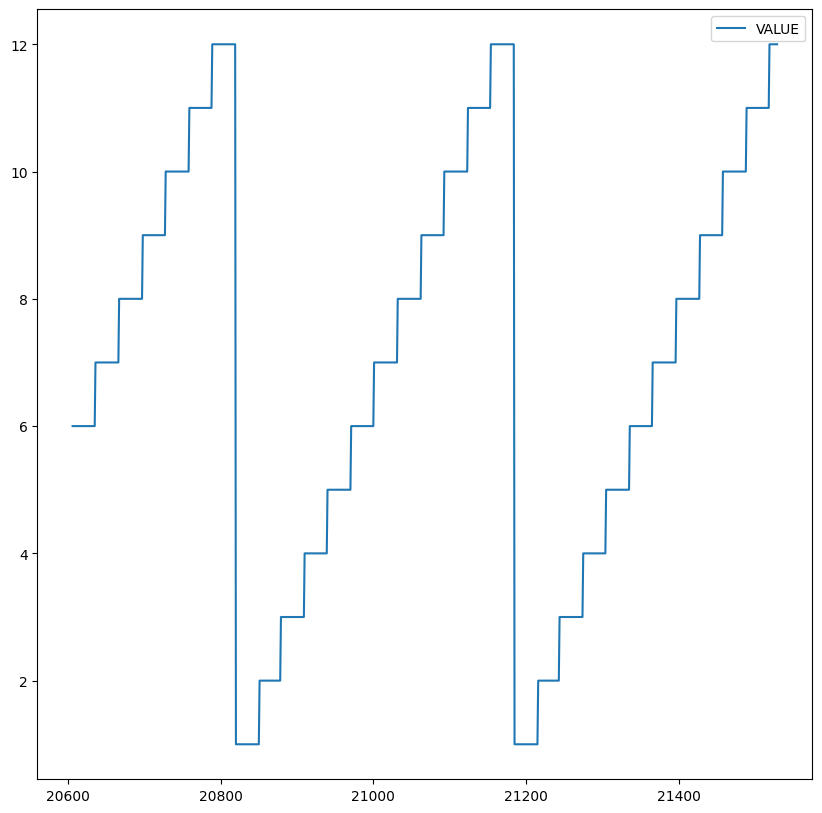

In [60]:
seasonality.plot(figsize=(10,10))
plt.show()

##Checking Autocorrelation

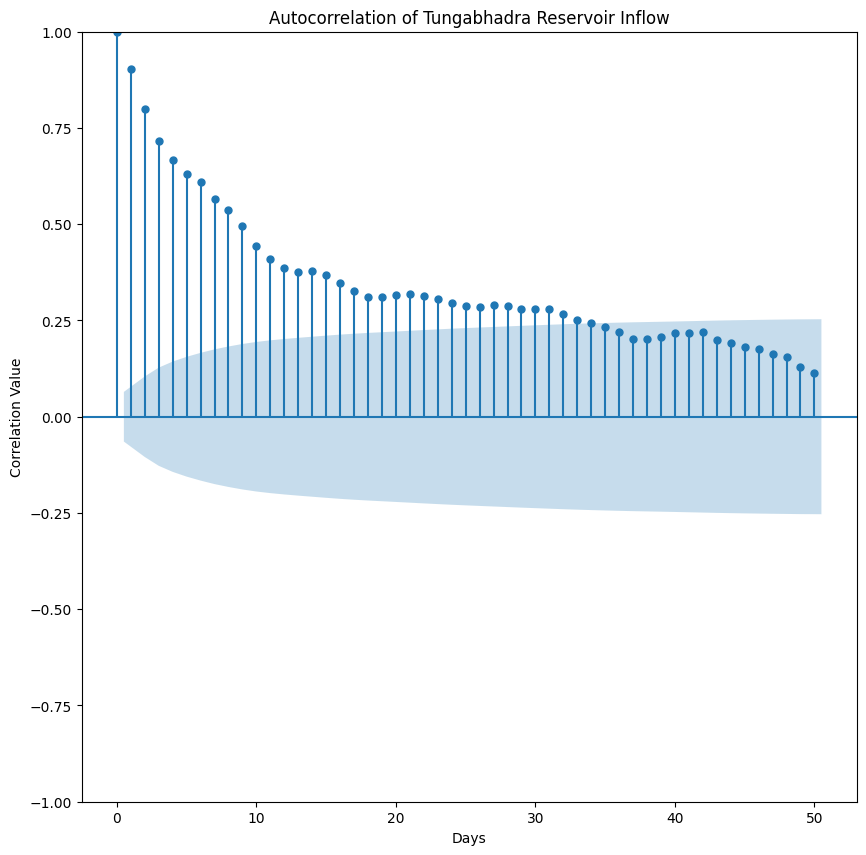

In [61]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_acf(bhadra_inflow,lags=50)
  plt.ylabel('Correlation Value')
  plt.xlabel('Days')
  plt.title('Autocorrelation of Tungabhadra Reservoir Inflow')
  plt.show()

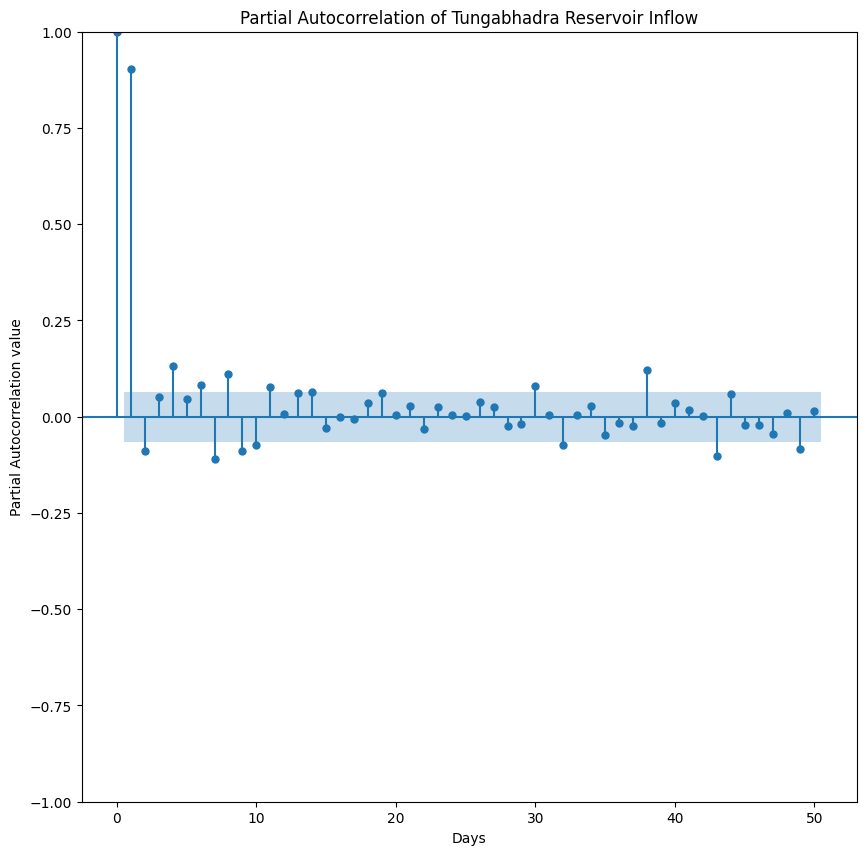

In [62]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_pacf(bhadra_inflow,lags=50)
  plt.xlabel('Days')
  plt.ylabel('Partial Autocorrelation value')
  plt.title('Partial Autocorrelation of Tungabhadra Reservoir Inflow')
  plt.show()

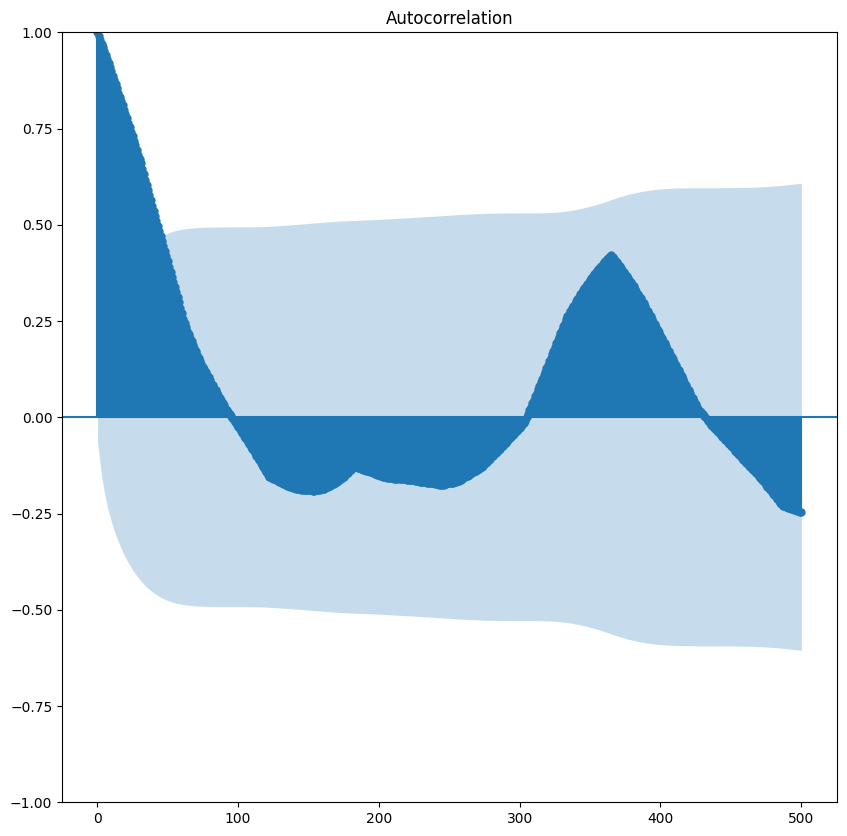

In [63]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_acf(bhadra_evaporation,lags=500)
  plt.show()

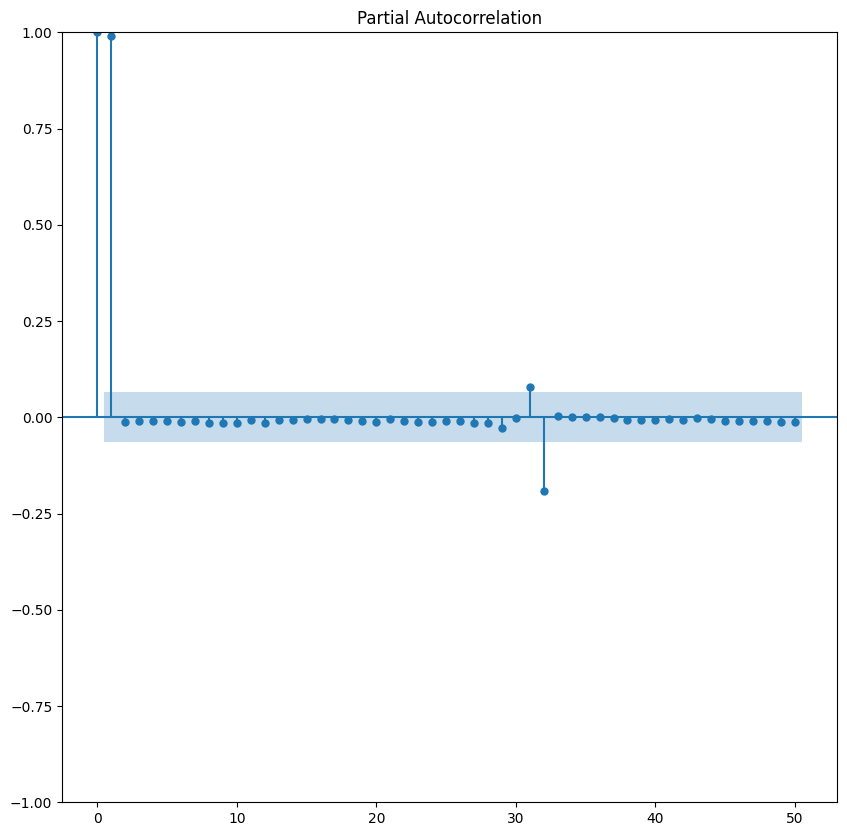

In [64]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_pacf(bhadra_evaporation,lags=50)
  plt.show()

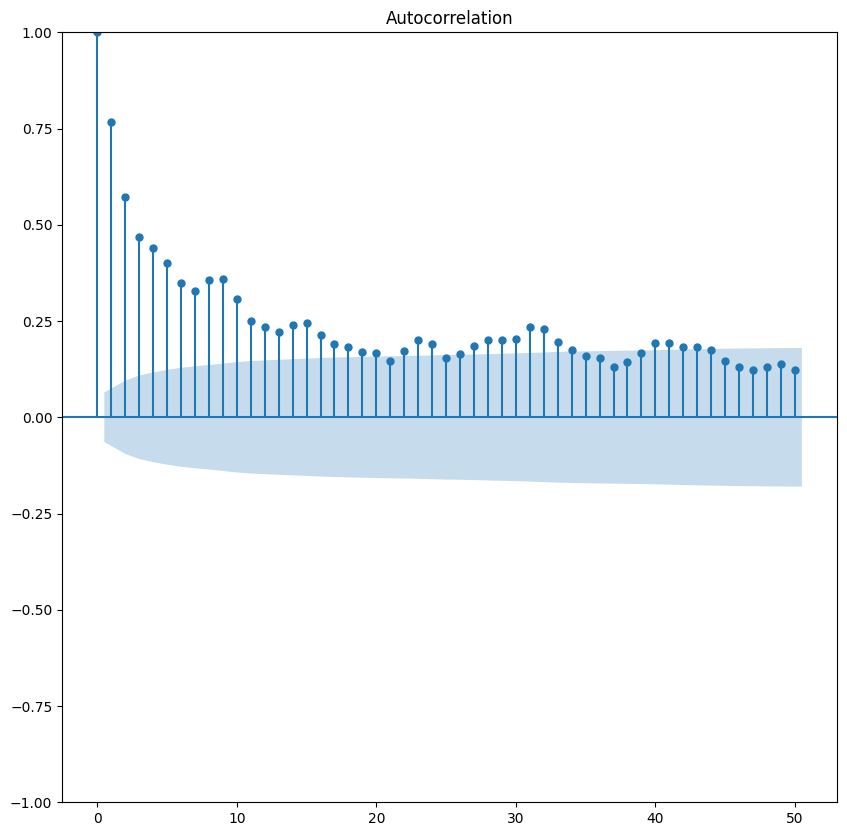

In [65]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_acf(bhadra_precipitation,lags=50)
  plt.show()

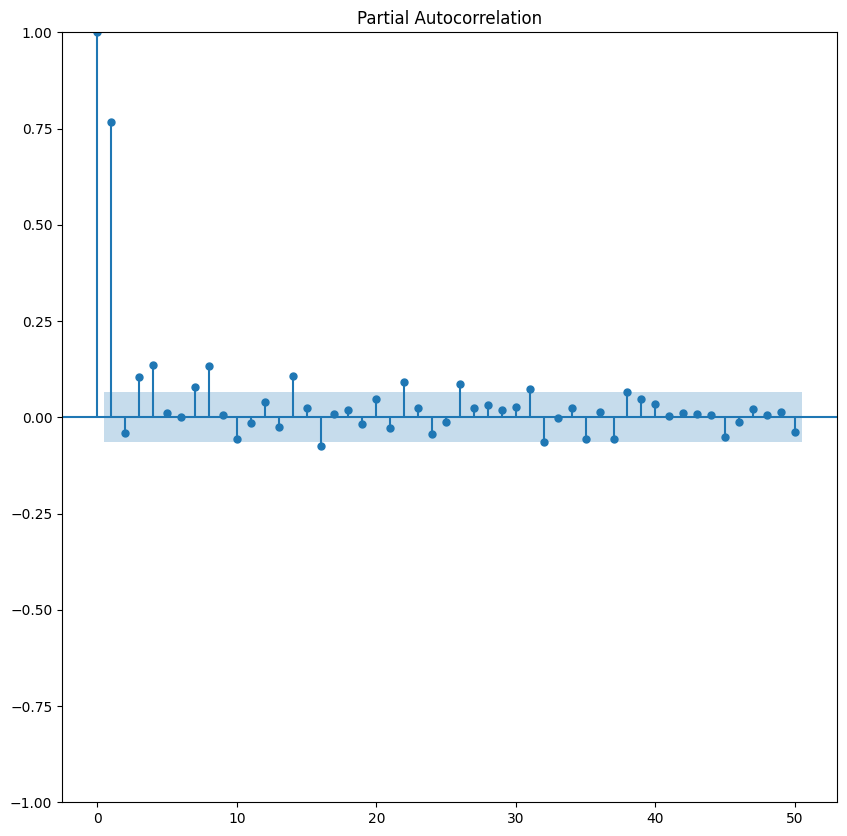

In [66]:
with mp.rc_context():
  mp.rc("figure",figsize=(10,10))
  plot_pacf(bhadra_precipitation,lags=50)
  plt.show()

##Preparaing Lagged Dataset

In [67]:
ao_lag = pd.DataFrame()
for i in range(7,0,-1):
	ao_lag['ao_t-'+str(i)] = ao.shift(i).values[:,0]
ao_lag['ao_t'] = ao.values[:,0]
ao_lag = ao_lag[8:]

In [68]:
epo_lag = pd.DataFrame()
for i in range(7,0,-1):
	epo_lag['epo_t-'+str(i)] = epo.shift(i).values[:,0]
epo_lag['epo_t'] = epo.values[:,0]
epo_lag = epo_lag[8:]

In [69]:
nao_lag = pd.DataFrame()
for i in range(7,0,-1):
	nao_lag['nao_t-'+str(i)] = nao.shift(i).values[:,0]
nao_lag['nao_t'] = nao.values[:,0]
nao_lag = nao_lag[8:]

In [70]:
nino12_lag = pd.DataFrame()
for i in range(7,0,-1):
	nino12_lag['nino12_t-'+str(i)] = nino12.shift(i).values[:,0]
nino12_lag['nino12_t'] = nino12.values[:,0]
nino12_lag = nino12_lag[8:]

In [71]:
nino3_lag = pd.DataFrame()
for i in range(7,0,-1):
	nino3_lag['nino3_t-'+str(i)] = nino3.shift(i).values[:,0]
nino3_lag['nino3_t'] = nino3.values[:,0]
nino3_lag = nino3_lag[8:]

In [72]:
nino34_lag = pd.DataFrame()
for i in range(7,0,-1):
	nino34_lag['nino34_t-'+str(i)] = nino34.shift(i).values[:,0]
nino34_lag['nino34_t'] = nino34.values[:,0]
nino34_lag = nino34_lag[8:]

In [73]:
nino4_lag = pd.DataFrame()
for i in range(7,0,-1):
	nino4_lag['nino4_t-'+str(i)] = nino4.shift(i).values[:,0]
nino4_lag['nino4_t'] = nino4.values[:,0]
nino4_lag = nino4_lag[8:]

In [74]:
pna_lag = pd.DataFrame()
for i in range(7,0,-1):
	pna_lag['pna_t-'+str(i)] = pna.shift(i).values[:,0]
pna_lag['pna_t'] = pna.values[:,0]
pna_lag = pna_lag[8:]

In [75]:
soi_lag = pd.DataFrame()
for i in range(7,0,-1):
	soi_lag['soi_t-'+str(i)] = soi.shift(i).values[:,0]
soi_lag['soi_t'] = soi.values[:,0]
soi_lag = soi_lag[8:]

In [76]:
wpo_lag = pd.DataFrame()
for i in range(7,0,-1):
	wpo_lag['wpo_t-'+str(i)] = wpo.shift(i).values[:,0]
wpo_lag['wpo_t'] = wpo.values[:,0]
wpo_lag = wpo_lag[8:]

In [77]:
seasonality_lag = pd.DataFrame()
for i in range(7,0,-1):
	seasonality_lag['seasonality_t-'+str(i)] = seasonality.shift(i).values[:,0]
seasonality_lag['seasonality_t'] = seasonality.values[:,0]
seasonality_lag = seasonality_lag[8:]

In [78]:
bhadra_evaporation_lag = pd.DataFrame()
for i in range(7,0,-1):
	bhadra_evaporation_lag['evaporation_t-'+str(i)] = bhadra_evaporation.shift(i).values[:,0]
bhadra_evaporation_lag['evaporation_t'] = bhadra_evaporation.values[:,0]
bhadra_evaporation_lag = bhadra_evaporation_lag[8:]

In [79]:
bhadra_precipitation_lag = pd.DataFrame()
for i in range(7,0,-1):
	bhadra_precipitation_lag['precipitation_t-'+str(i)] = bhadra_precipitation.shift(i).values[:,0]
bhadra_precipitation_lag['precipitation_t'] = bhadra_precipitation.values[:,0]
bhadra_precipitation_lag = bhadra_precipitation_lag[8:]

In [80]:
bhadra_inflow_lag = pd.DataFrame()
inflow = pd.DataFrame()
for i in range(7,0,-1):
	bhadra_inflow_lag['inflow_t-'+str(i)] = bhadra_inflow.shift(i).values[:,0]
inflow['VALUE'] = bhadra_inflow.values[:,0]
bhadra_inflow_lag = bhadra_inflow_lag[8:]
inflow = inflow[8:]

##Formatting Dataset

In [81]:
df_list = [ao_lag,epo_lag,nao_lag,nino12_lag,nino3_lag,nino34_lag,nino4_lag,pna_lag,soi_lag,wpo_lag,seasonality_lag,bhadra_evaporation_lag,bhadra_precipitation_lag,bhadra_inflow_lag]
X = pd.concat(df_list,axis=1)
y = inflow.copy()

##StandardScaler

In [82]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [84]:
sel = SelectFromModel(RandomForestRegressor(),threshold=0.01)
sel.fit(X_scaler,y['VALUE'])
selected_feat= X.columns[(sel.get_support())]
indexes = []
# print(sel.get_support())
a = list(sel.get_support())
# print(selected_feat)
for i in range(len(a)):
  if a[i] == True:
    indexes.append(i)
# pd.series(sel.estimator_,feature_importances_,ravel()).hist()

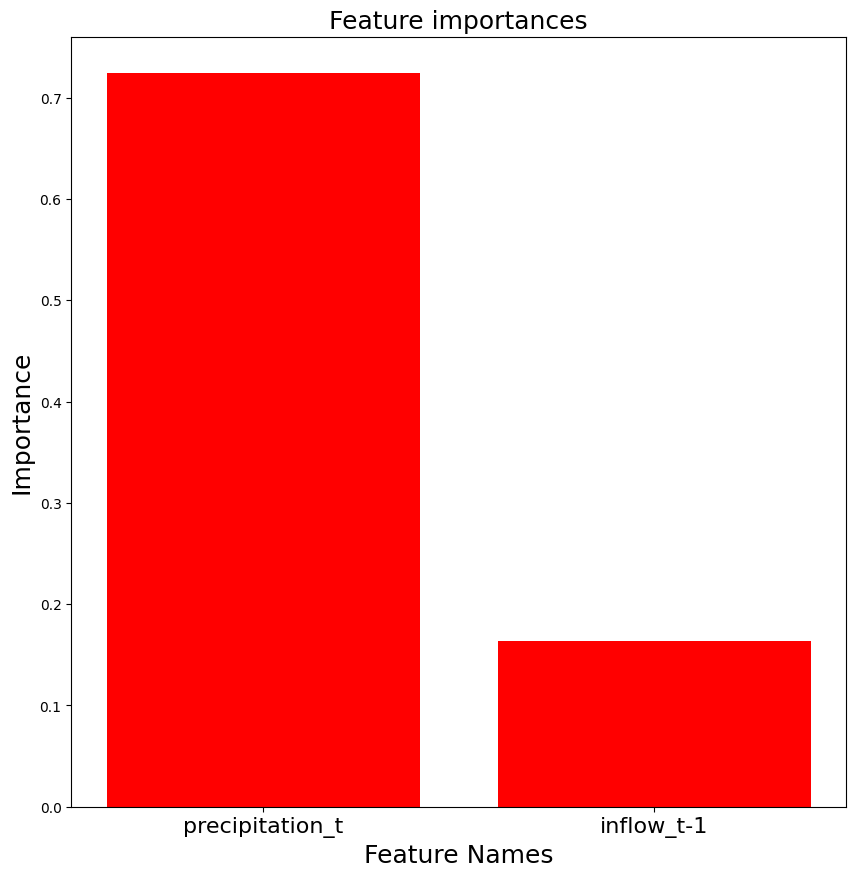

In [85]:
columns = X.columns
t_importances = sel.estimator_.feature_importances_
importances = []
for i in range(t_importances.shape[0]):
  if t_importances[i] >= 0.01:
    importances.append(t_importances[i])
importances = np.array(importances)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,10))
plt.title("Feature importances",size=18)
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), columns[indexes],size=16)
plt.xlabel("Feature Names",size=18)
plt.ylabel("Importance",size=18)
plt.show()

In [86]:
print(indices)

[1 0]


In [87]:
X_pca = X_scaler[:, indexes]

##Principal Component Analysis

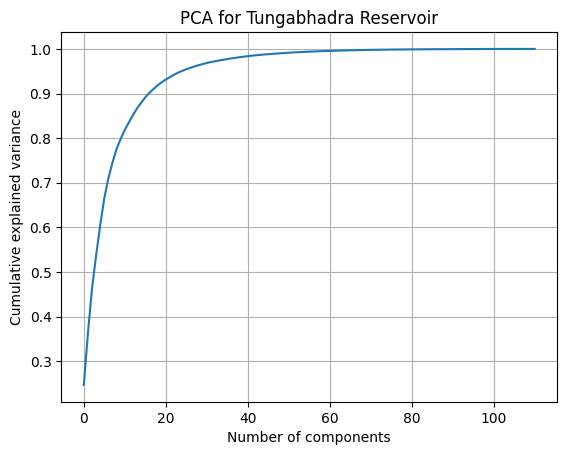

In [88]:
pca = PCA().fit(X_scaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA for Tungabhadra Reservoir')
plt.grid()
plt.show()

## Measurement

In [93]:
def correlation(s, o):
    if s.size == 0:
        corr = np.NaN
    else:
        corr = np.corrcoef(o, s)[0,1]
    return corr

def NS(s, o):
    return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)

def KGE(s, o):
    cc = correlation(s,o)
    alpha = np.std(s)/np.std(o)
    beta = np.sum(s)/np.sum(o)
    kge = 1- np.sqrt( (cc-1)**2 + (alpha-1)**2 + (beta-1)**2 )
    return kge
  
from scipy.stats import pearsonr
def CORR(s,o):
  corr, _ = pearsonr(test,preds)
  return corr
def Absolute_Percentage_Error(s,o):
  return (np.sum(np.abs(s-o))/np.sum(o))*100

##Number of Components taken 20 considering these 20 contans almost 95% variance

In [94]:
# pca = PCA(n_components=20)
# X_pca = pca.fit_transform(X_scaler)

In [95]:
rf = RandomForestRegressor(n_estimators=10,max_depth=5,min_samples_leaf=4)
kf = KFold(n_splits=3,shuffle=False)
score_rf_50 = []
corr_rf_50 = []
r2_rf_50 = []
mae_rf_50 = []
apb_50 = []
nse_50 = []
kge_50 = []
r_rf_1 = []
p_rf_1 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    r_rf_1.extend(y_real_list)
    p_rf_1.extend(y_list_pred)
    y_real = np.array(y_real_list)
    score_rf_50.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_50.append(correlation(y_real,y_pred))
    r2_rf_50.append(r2_score(y_real,y_pred))
    mae_rf_50.append(mean_absolute_error(y_real,y_pred))
    apb_50.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_50.append(NS(y_real,y_pred))
    kge_50.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/3726203190.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/tmp/ipykernel_505129/3726203190.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/tmp/ipykernel_505129/3726203190.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 52.46it/s]


In [96]:
print('RMSE ',mean(score_rf_50))
print('CORR ',mean(corr_rf_50))
print('R2 ',mean(r2_rf_50))
print('MAE ',mean(mae_rf_50))
print('APB ', mean(apb_50))
print('KGE ',mean(kge_50))
print('NS ',mean(nse_50))

RMSE  68.49020160675997
CORR  0.9288071511817754
R2  0.8529246036358601
MAE  27.469262778823314
APB  27.6534503018867
KGE  0.8382927041266334
NS  0.8202747654784157


##Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

**n_estimators = 50**

In [98]:
rf = RandomForestRegressor(n_estimators=50)
kf = KFold(n_splits=3,shuffle=False)
score_rf_50 = []
corr_rf_50 = []
r2_rf_50 = []
mae_rf_50 = []
apb_50 = []
kge_50 = []
nse_50 = []
r_rf_1 = []
p_rf_1 = []
probarf1 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    r_rf_1.extend(y_real_list)
    p_rf_1.extend(y_list_pred)
    y_real = np.array(y_real_list)
    score_rf_50.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_50.append(correlation(y_real,y_pred))
    r2_rf_50.append(r2_score(y_real,y_pred))
    mae_rf_50.append(mean_absolute_error(y_real,y_pred))
    apb_50.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_50.append(NS(y_real,y_pred))
    kge_50.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/1783397772.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:00,  9.67it/s]/tmp/ipykernel_505129/1783397772.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/tmp/ipykernel_505129/1783397772.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]


In [99]:
rf_50 = pd.DataFrame({'actual':r_rf_1,'predict':p_rf_1})
rf_50.to_csv('rf_50.csv')

In [100]:
print('RMSE ',mean(score_rf_50))
print('CORR ',mean(corr_rf_50))
print('R2 ',mean(r2_rf_50))
print('MAE ',mean(mae_rf_50))
print('APB ', mean(apb_50))
print('NSE ',mean(nse_50))
print('KGE ',mean(kge_50))

RMSE  67.0583026446934
CORR  0.9323426611930232
R2  0.858809187681904
MAE  26.992934125617534
APB  26.82849033861583
NSE  0.8374805042695167
KGE  0.8497411519882149


**n_estimators = 100**

In [101]:
rf = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=3,shuffle=False)
score_rf_100 = []
corr_rf_100 = []
r2_rf_100 = []
mae_rf_100 = []
apb_100 = []
nse_100 = []
kge_100 = []
r_rf_2 = []
p_rf_2 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    y_real = np.array(y_real_list)
    r_rf_2.extend(y_real_list)
    p_rf_2.extend(y_list_pred)
    score_rf_100.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_100.append(correlation(y_real,y_pred))
    r2_rf_100.append(r2_score(y_real,y_pred))
    mae_rf_100.append(mean_absolute_error(y_real,y_pred))
    apb_100.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_100.append(NS(y_real,y_pred))
    kge_100.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/388751134.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:00,  4.74it/s]/tmp/ipykernel_505129/388751134.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  67%|██████▋   | 2/3 [00:00<00:00,  4.96it/s]/tmp/ipykernel_505129/388751134.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]


In [102]:
rf_100 = pd.DataFrame({'actual':r_rf_2,'predict':p_rf_2})
rf_100.to_csv('rf_100.csv')

In [103]:
print('RMSE ',mean(score_rf_100))
print('CORR ',mean(corr_rf_100))
print('R2 ',mean(r2_rf_100))
print('MAE ',mean(mae_rf_100))
print('APB ', mean(apb_100))
print('NSE ',mean(nse_100))
print('KGE ',mean(kge_100))

RMSE  66.52823675508164
CORR  0.9351939039141558
R2  0.8597114536278915
MAE  26.851122995429527
APB  26.902199617520452
NSE  0.8367257099066957
KGE  0.8311913994719097


**n_estimators = 200**

In [104]:
rf = RandomForestRegressor(n_estimators=200)
kf = KFold(n_splits=3,shuffle=False)
score_rf_200 = []
corr_rf_200 = []
r2_rf_200 = []
mae_rf_200 = []
apb_200 = []
nse_200 = []
kge_200 = []
r_rf_3 = []
p_rf_3 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    y_real = np.array(y_real_list)
    r_rf_3.extend(y_real_list)
    p_rf_3.extend(y_list_pred)
    score_rf_200.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_200.append(correlation(y_real,y_pred))
    r2_rf_200.append(r2_score(y_real,y_pred))
    mae_rf_200.append(mean_absolute_error(y_real,y_pred))
    apb_200.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_200.append(NS(y_real,y_pred))
    kge_200.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/382908302.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:00,  2.66it/s]/tmp/ipykernel_505129/382908302.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  67%|██████▋   | 2/3 [00:00<00:00,  2.75it/s]/tmp/ipykernel_505129/382908302.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]


In [105]:
rf_200 = pd.DataFrame({'actual':r_rf_3,'predict':p_rf_3})
rf_200.to_csv('rf_200.csv')

In [106]:
print('RMSE ',mean(score_rf_200))
print('CORR ',mean(corr_rf_200))
print('R2 ',mean(r2_rf_200))
print('MAE ',mean(mae_rf_200))
print('APB ',mean(apb_200))
print('NSE ',mean(nse_200))
print('KGE ',mean(kge_200))

RMSE  66.65516244411229
CORR  0.9337328989892256
R2  0.859815115091953
MAE  26.646185348642486
APB  26.679186251424554
NSE  0.8371611789295055
KGE  0.8422692218924361


**n_estimators = 300**

In [107]:
rf = RandomForestRegressor(n_estimators=300)
kf = KFold(n_splits=3,shuffle=False)
score_rf_300 = []
corr_rf_300 = []
r2_rf_300 = []
mae_rf_300 = []
apb_300 = []
nse_300 = []
kge_300 = []
r_rf_4 = []
p_rf_4 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    y_real = np.array(y_real_list)
    r_rf_4.extend(y_real_list)
    p_rf_4.extend(y_list_pred)
    score_rf_300.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_300.append(correlation(y_real,y_pred))
    r2_rf_300.append(r2_score(y_real,y_pred))
    mae_rf_300.append(mean_absolute_error(y_real,y_pred))
    apb_300.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_300.append(NS(y_real,y_pred))
    kge_300.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/388586653.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:01,  1.82it/s]/tmp/ipykernel_505129/388586653.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  67%|██████▋   | 2/3 [00:01<00:00,  1.86it/s]/tmp/ipykernel_505129/388586653.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


In [108]:
rf_300 = pd.DataFrame({'actual':r_rf_4,'predict':p_rf_4})
rf_300.to_csv('rf_300.csv')

In [109]:
print('RMSE ',mean(score_rf_300))
print('CORR ',mean(corr_rf_300))
print('R2 ',mean(r2_rf_300))
print('MAE ',mean(mae_rf_300))
print('APB ',mean(apb_300))
print('NSE ',mean(nse_300))
print('KGE ',mean(kge_300))

RMSE  66.06656172024532
CORR  0.9345735620065396
R2  0.8624411771289163
MAE  26.56193953500114
APB  26.583505015620972
NSE  0.839498910574348
KGE  0.8464628826791608


**n_estimators= 400**

In [110]:
rf = RandomForestRegressor(n_estimators=400)
kf = KFold(n_splits=3,shuffle=False)
score_rf_400 = []
corr_rf_400 = []
r2_rf_400 = []
mae_rf_400 = []
apb_400 =[]
nse_400 = []
kge_400 = []
r_rf_5 = []
p_rf_5 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    y_real = np.array(y_real_list)
    r_rf_5.extend(y_real_list)
    p_rf_5.extend(y_list_pred)
    score_rf_400.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_400.append(correlation(y_real,y_pred))
    r2_rf_400.append(r2_score(y_real,y_pred))
    mae_rf_400.append(mean_absolute_error(y_real,y_pred))
    apb_400.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_400.append(NS(y_real,y_pred))
    kge_400.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/1491635218.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:01,  1.34it/s]/tmp/ipykernel_505129/1491635218.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  67%|██████▋   | 2/3 [00:01<00:00,  1.37it/s]/tmp/ipykernel_505129/1491635218.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


In [111]:
rf_400 = pd.DataFrame({'actual':r_rf_5,'predict':p_rf_5})
rf_400.to_csv('rf_400.csv')

In [112]:
print('RMSE ',mean(score_rf_400))
print('CORR ',mean(corr_rf_400))
print('R2 ',mean(r2_rf_400))
print('MAE ',mean(mae_rf_400))
print('APB ',mean(apb_400))
print('NSE ',mean(nse_400))
print('KGE ',mean(kge_400))

RMSE  66.81202286271818
CORR  0.9337354852963874
R2  0.8597040780252561
MAE  26.84924689397145
APB  26.875461406643243
NSE  0.8352593502870039
KGE  0.8387675361588731


**n_estimators = 500**

In [113]:
rf = RandomForestRegressor(n_estimators=500)
kf = KFold(n_splits=3,shuffle=False)
score_rf_500 = []
corr_rf_500 = []
r2_rf_500 = []
mae_rf_500 = []
apb_500 = []
nse_500 = []
kge_500 = []
r_rf_6 = []
p_rf_6 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_list_pred = list(rf.predict(X_test))
    y_pred = np.array(y_list_pred)
    y_real_list = list(y_test['VALUE'])
    y_real = np.array(y_real_list)
    r_rf_6.extend(y_real_list)
    p_rf_6.extend(y_list_pred)
    score_rf_500.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    corr_rf_500.append(correlation(y_real,y_pred))
    r2_rf_500.append(r2_score(y_real,y_pred))
    mae_rf_500.append(mean_absolute_error(y_real,y_pred))
    apb_500.append(Absolute_Percentage_Error(y_real,y_pred))
    nse_500.append(NS(y_real,y_pred))
    kge_500.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_505129/1526141547.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  33%|███▎      | 1/3 [00:00<00:01,  1.08it/s]/tmp/ipykernel_505129/1526141547.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold:  67%|██████▋   | 2/3 [00:01<00:00,  1.07it/s]/tmp/ipykernel_505129/1526141547.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
k-fold: 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]


In [114]:
rf_500 = pd.DataFrame({'actual':r_rf_6,'predict':p_rf_6})
rf_500.to_csv('rf_500.csv')

In [115]:
print('RMSE ',mean(score_rf_500))
print('CORR ',mean(corr_rf_500))
print('R2 ',mean(r2_rf_500))
print('MAE ',mean(mae_rf_500))
print('APB ',mean(apb_500))
print('NSE ',mean(nse_500))
print('KGE ',mean(kge_500))

RMSE  66.48969110290645
CORR  0.9342832851253997
R2  0.8606514238332014
MAE  26.613911258637838
APB  26.704831333934422
NSE  0.8366477417745931
KGE  0.8387203740733993


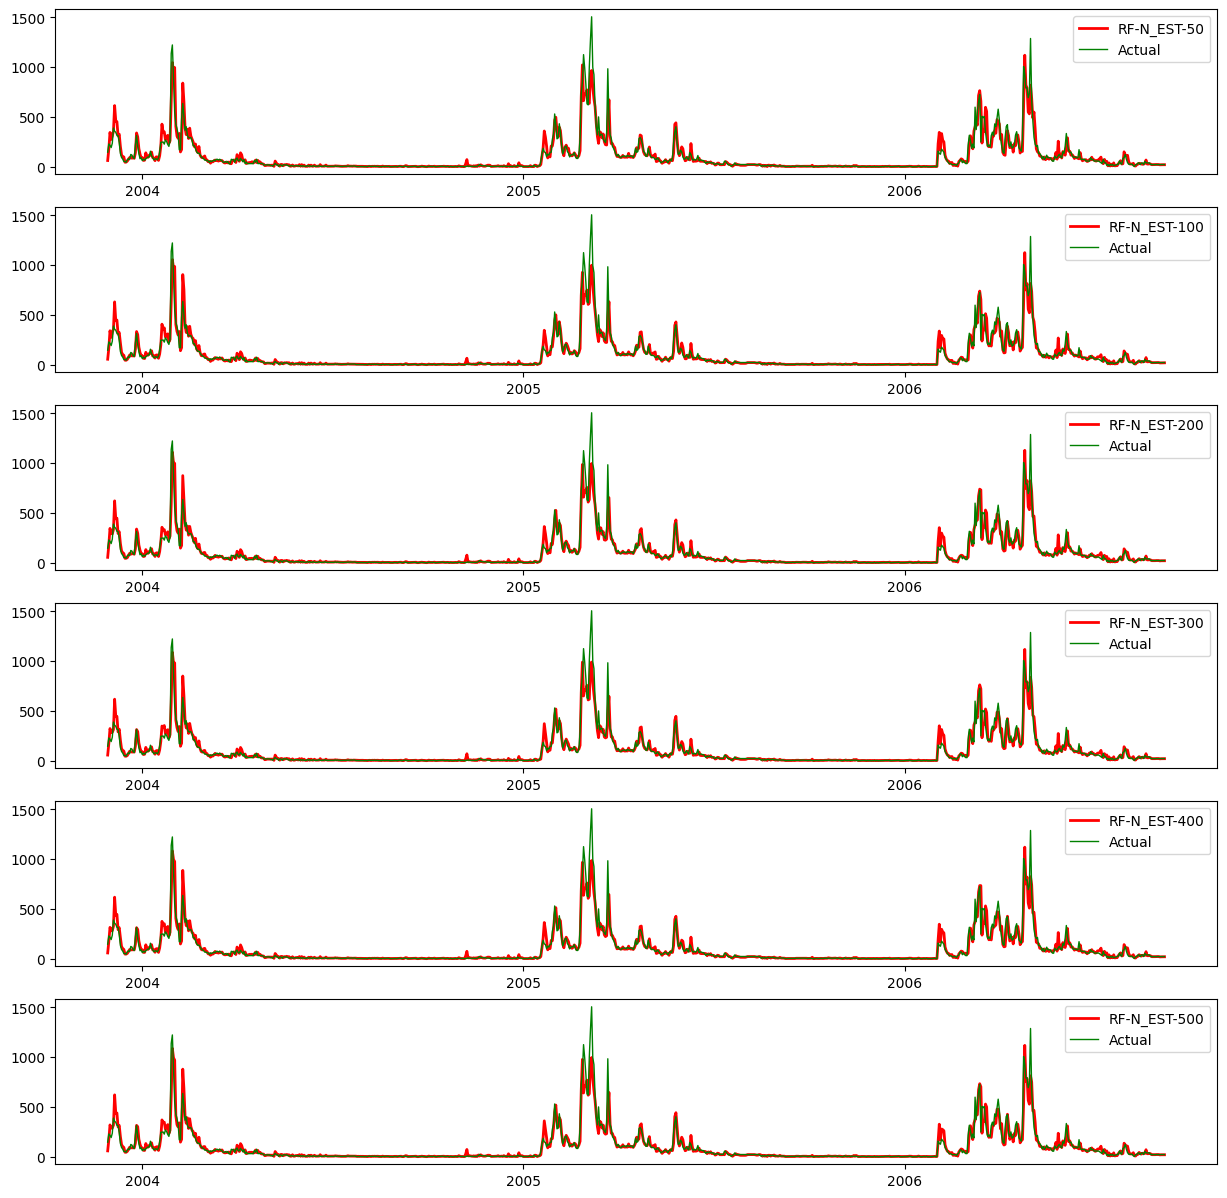

In [116]:
fig,ax = plt.subplots(6,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(p_rf_1,"red",label='RF-N_EST-50',linewidth=2.0)
ax[0].plot(r_rf_1,"green",label='Actual',linewidth=1.0)
ax[0].legend()
ax[1].plot(p_rf_2,"red",label='RF-N_EST-100',linewidth=2.0)
ax[1].plot(r_rf_2,"green",label='Actual',linewidth=1.0)
ax[1].legend()
ax[2].plot(p_rf_3,"red",label='RF-N_EST-200',linewidth=2.0)
ax[2].plot(r_rf_3,"green",label='Actual',linewidth=1.0)
ax[2].legend()
ax[3].plot(p_rf_4,"red",label='RF-N_EST-300',linewidth=2.0)
ax[3].plot(r_rf_4,"green",label='Actual',linewidth=1.0)
ax[3].legend()
ax[4].plot(p_rf_5,"red",label='RF-N_EST-400',linewidth=2.0)
ax[4].plot(r_rf_5,"green",label='Actual',linewidth=1.0)
ax[4].legend()
ax[5].plot(p_rf_6,"red",label='RF-N_EST-500',linewidth=2.0)
ax[5].plot(r_rf_6,"green",label='Actual',linewidth=1.0)
ax[5].legend()
plt.show()

##Gradient Boosting Regressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

**30, 1**

In [118]:
gbr = GradientBoostingRegressor(n_estimators=30)
kf = KFold(n_splits=3, shuffle=False)
def_gbr_score4 = []
def_gbr_score4_corr = []
def_gbr_score4_mae = []
def_gbr_score4_r2 = []
def_gbr_apb = []
def_gbr_nse = []
def_gbr_kge = []
r_gbr_1 = []
p_gbr_1 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_1.extend(y_list_real)
    p_gbr_1.extend(y_list_pred)
    def_gbr_score4.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score4_corr.append(correlation(y_real,y_pred))
    def_gbr_score4_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score4_r2.append(r2_score(y_real,y_pred))
    def_gbr_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_nse.append(NS(y_real,y_pred))
    def_gbr_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 32.11it/s]


In [119]:
gbr_30 = pd.DataFrame({'actual':r_gbr_1,'predict':p_gbr_1})
gbr_30.to_csv('gbr_30.csv')

In [120]:
print('RMSE ',mean(def_gbr_score4))
print('CORR ',mean(def_gbr_score4_corr))
print('R2 ',mean(def_gbr_score4_r2))
print('MAE ',mean(def_gbr_score4_mae))
print('APB ',mean(def_gbr_apb))
print('NSE ',mean(def_gbr_nse))
print('KGE ',mean(def_gbr_kge))

RMSE  65.61982908296449
CORR  0.9366188804274687
R2  0.8656300785050627
MAE  27.579090887103337
APB  27.378882814665616
NSE  0.830302929797877
KGE  0.8224631018393546


**40, 1**

In [121]:
gbr = GradientBoostingRegressor(n_estimators=40)
kf = KFold(n_splits=3, shuffle=False)
def_gbr_score3 = []
def_gbr_score3_corr = []
def_gbr_score3_mae = []
def_gbr_score3_r2 = []
def_gbr_score3_apb = []
def_gbr_score3_nse = []
def_gbr_score3_kge = []
r_gbr_2 = []
p_gbr_2 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_2.extend(y_list_real)
    p_gbr_2.extend(y_list_pred)
    def_gbr_score3.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score3_corr.append(correlation(y_real,y_pred))
    def_gbr_score3_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score3_r2.append(r2_score(y_real,y_pred))
    def_gbr_score3_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_score3_nse.append(NS(y_real,y_pred))
    def_gbr_score3_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 29.26it/s]


In [122]:
gbr_40 = pd.DataFrame({'actual':r_gbr_2,'predict':p_gbr_2})
gbr_40.to_csv('gbr_40.csv')

In [123]:
print('RMSE ',mean(def_gbr_score3))
print('CORR ',mean(def_gbr_score3_corr))
print('R2 ',mean(def_gbr_score3_r2))
print('MAE ',mean(def_gbr_score3_mae))
print('APB ',mean(def_gbr_score3_apb))
print('NSE ',mean(def_gbr_score3_nse))
print('KGE ',mean(def_gbr_score3_kge))

RMSE  66.67503036719151
CORR  0.9332316723490092
R2  0.8597548994178755
MAE  27.28677108819381
APB  26.98921043948382
NSE  0.8366283508271559
KGE  0.8411813124240328


**n_estimators=50** 

In [124]:
gbr = GradientBoostingRegressor(n_estimators=50)
kf = KFold(n_splits=3, shuffle=False)
def_gbr_score2 = []
def_gbr_score2_corr = []
def_gbr_score2_mae = []
def_gbr_score2_r2 = []
def_gbr_score2_apb = []
def_gbr_score2_nse = []
def_gbr_score2_kge = []
r_gbr_3 = []
p_gbr_3 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_3.extend(y_list_real)
    p_gbr_3.extend(y_list_pred)
    def_gbr_score2.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score2_corr.append(correlation(y_real,y_pred))
    def_gbr_score2_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score2_r2.append(r2_score(y_real,y_pred))
    def_gbr_score2_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_score2_nse.append(NS(y_real,y_pred))
    def_gbr_score2_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 25.92it/s]


In [125]:
gbr_50 = pd.DataFrame({'actual':r_gbr_3,'predict':p_gbr_3})
gbr_50.to_csv('gbr_50.csv')

In [126]:
print('RMSE ',mean(def_gbr_score2))
print('CORR ',mean(def_gbr_score2_corr))
print('R2 ',mean(def_gbr_score2_r2))
print('MAE ',mean(def_gbr_score2_mae))
print('APB ',mean(def_gbr_score2_apb))
print('NSE ',mean(def_gbr_score2_nse))
print('KGE ',mean(def_gbr_score2_kge))

RMSE  67.35458076542383
CORR  0.9320970714933223
R2  0.8571518507333499
MAE  27.31346482245169
APB  27.042994113454814
NSE  0.8368619913263007
KGE  0.8439629296587834


**n_estimators = 10**

In [127]:
gbr = GradientBoostingRegressor(n_estimators=10)
kf = KFold(n_splits=3, shuffle=False)
def_gbr_score = []
def_gbr_score_corr = []
def_gbr_score_mae = []
def_gbr_score_r2 = []
def_gbr_score_apb = []
def_gbr_score_nse = []
def_gbr_score_kge = []
r_gbr_4 = []
p_gbr_4 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_4.extend(y_list_real)
    p_gbr_4.extend(y_list_pred)
    def_gbr_score.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score_corr.append(correlation(y_real,y_pred))
    def_gbr_score_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score_r2.append(r2_score(y_real,y_pred))
    def_gbr_score_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_score_nse.append(NS(y_real,y_pred))
    def_gbr_score_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 89.21it/s]


In [128]:
gbr_100 = pd.DataFrame({'actual':r_gbr_4,'predict':p_gbr_4})
gbr_100.to_csv('gbr_100.csv')

In [129]:
print('RMSE ',mean(def_gbr_score))
print('CORR ',mean(def_gbr_score_corr))
print('R2 ',mean(def_gbr_score_r2))
print('MAE ',mean(def_gbr_score_mae))
print('APB ',mean(def_gbr_score_apb))
print('NSE ',mean(def_gbr_score_nse))
print('KGE ',mean(def_gbr_score_kge))

RMSE  92.00132453925119
CORR  0.9279377358911035
R2  0.7399417774495101
MAE  48.46609479175966
APB  48.91122407296667
NSE  0.24087801854927984
KGE  0.2878750931407042


**n_estimators=20**

In [130]:
gbr = GradientBoostingRegressor(n_estimators=20)
kf = KFold(n_splits=3, shuffle=False)
gbr_score_7 = []
def_gbr_score7_corr = []
def_gbr_score7_mae = []
def_gbr_score7_r2 = []
def_gbr_score7_apb =[]
def_gbr_score7_nse = []
def_gbr_score7_kge = []
r_gbr_5 = []
p_gbr_5 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_5.extend(y_list_real)
    p_gbr_5.extend(y_list_pred)
    gbr_score_7.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score7_corr.append(correlation(y_real,y_pred))
    def_gbr_score7_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score7_r2.append(r2_score(y_real,y_pred))
    def_gbr_score7_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_score7_nse.append(NS(y_real,y_pred))
    def_gbr_score7_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]


In [131]:
gbr_200 = pd.DataFrame({'actual':r_gbr_5,'predict':p_gbr_5})
gbr_200.to_csv('gbr_200.csv')

In [132]:
print('RMSE ',mean(gbr_score_7))
print('CORR ',mean(def_gbr_score7_corr))
print('R2 ',mean(def_gbr_score7_r2))
print('MAE ',mean(def_gbr_score7_mae))
print('APB ',mean(def_gbr_score7_apb))
print('NSE ',mean(def_gbr_score7_nse))
print('KGE ',mean(def_gbr_score7_kge))

RMSE  68.45862649990205
CORR  0.9377358001591264
R2  0.855414767186905
MAE  30.575891568898243
APB  30.630445842038505
NSE  0.7766154190488747
KGE  0.7335556446971577


**n_estimators=30**

In [133]:
gbr = GradientBoostingRegressor(n_estimators=30)
kf = KFold(n_splits=3, shuffle=False)
gbr_score_1 = []
def_gbr_score1_corr = []
def_gbr_score1_mae = []
def_gbr_score1_r2 = []
def_gbr_score1_apb =[]
def_gbr_score1_nse = []
def_gbr_score1_kge = []
r_gbr_6 = []
p_gbr_6 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train, y_train)
    y_list_pred = list(gbr.predict(X_test))
    for i in range(len(y_list_pred)):
      if y_list_pred[i] < 0:
        y_list_pred[i] = 0
    y_pred = np.array(y_list_pred)
    y_list_real = list(y_test['VALUE'])
    y_real = np.array(y_list_real)
    r_gbr_6.extend(y_list_real)
    p_gbr_6.extend(y_list_pred)
    gbr_score_1.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    def_gbr_score1_corr.append(correlation(y_real,y_pred))
    def_gbr_score1_mae.append(mean_absolute_error(y_real,y_pred))
    def_gbr_score1_r2.append(r2_score(y_real,y_pred))
    def_gbr_score1_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    def_gbr_score1_nse.append(NS(y_real,y_pred))
    def_gbr_score1_kge.append(KGE(y_real,y_pred))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
k-fold: 100%|██████████| 3/3 [00:00<00:00, 37.58it/s]


In [134]:
gbr_300 = pd.DataFrame({'actual':r_gbr_6,'predict':p_gbr_6})
gbr_300.to_csv('gbr_300.csv')

In [135]:
print('RMSE ',mean(gbr_score_1))
print('CORR ',mean(def_gbr_score1_corr))
print('R2 ',mean(def_gbr_score1_r2))
print('MAE ',mean(def_gbr_score1_mae))
print('APB ',mean(def_gbr_score1_apb))
print('NSE ',mean(def_gbr_score1_nse))
print('KGE ',mean(def_gbr_score1_kge))

RMSE  65.69955672468711
CORR  0.9360783885372408
R2  0.8651957981940757
MAE  27.571109551023966
APB  27.43435640308951
NSE  0.8285076074931791
KGE  0.8228697640637734


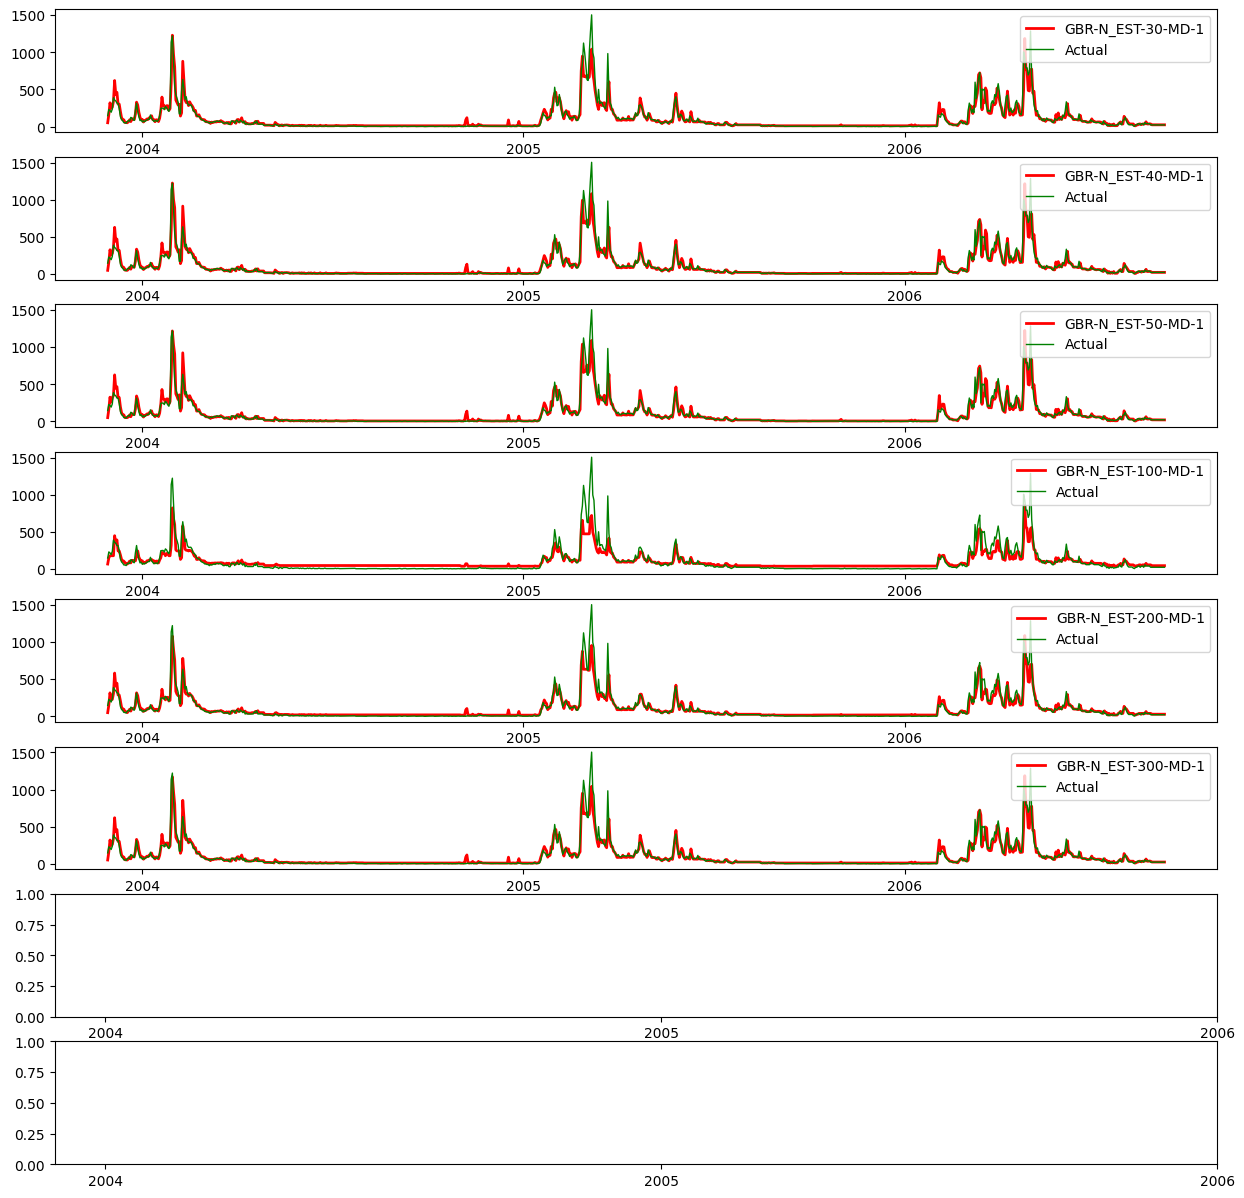

In [137]:
fig,ax = plt.subplots(8,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(p_gbr_1,"red",label='GBR-N_EST-30-MD-1',linewidth=2.0)
ax[0].plot(r_gbr_1,"green",label='Actual',linewidth=1.0)
ax[0].legend()
ax[1].plot(p_gbr_2,"red",label='GBR-N_EST-40-MD-1',linewidth=2.0)
ax[1].plot(r_gbr_2,"green",label='Actual',linewidth=1.0)
ax[1].legend()
ax[2].plot(p_gbr_3,"red",label='GBR-N_EST-50-MD-1',linewidth=2.0)
ax[2].plot(r_gbr_3,"green",label='Actual',linewidth=1.0)
ax[2].legend()
ax[3].plot(p_gbr_4,"red",label='GBR-N_EST-100-MD-1',linewidth=2.0)
ax[3].plot(r_gbr_4,"green",label='Actual',linewidth=1.0)
ax[3].legend()
ax[4].plot(p_gbr_5,"red",label='GBR-N_EST-200-MD-1',linewidth=2.0)
ax[4].plot(r_gbr_5,"green",label='Actual',linewidth=1.0)
ax[4].legend()
ax[5].plot(p_gbr_6,"red",label='GBR-N_EST-300-MD-1',linewidth=2.0)
ax[5].plot(r_gbr_6,"green",label='Actual',linewidth=1.0)
ax[5].legend()
# ax[6].plot(p_gbr_7,"red",label='GBR-N_EST-400-MD-1',linewidth=2.0)
# ax[6].plot(r_gbr_7,"green",label='Actual',linewidth=1.0)
# ax[6].legend()
# ax[7].plot(p_gbr_8,"red",label='GBR-N_EST-500-MD-1',linewidth=2.0)
# ax[7].plot(r_gbr_8,"green",label='Actual',linewidth=1.0)
# ax[7].legend()
plt.show()

##KNN Regressor

In [138]:
from sklearn.neighbors import KNeighborsRegressor

**n=2**

In [139]:
knn = KNeighborsRegressor(n_neighbors=2)
kf = KFold(n_splits=3, shuffle=False)
knn_2_rmse = []
knn_2_corr = []
knn_2_r2 = []
knn_2_mae = []
knn_2_apb =[]
knn_2_nse = []
knn_2_kge = []
r_knn_1 = []
p_knn_1 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_list = knn.predict(X_test)
    y_real = []
    y_pred = []
    for i in y_test['VALUE']:
      y_real.append(i)
    for i in y_list:
      y_pred.append(i)
    r_knn_1.extend(y_real)
    p_knn_1.extend(y_pred)
    y_pred = np.array(y_pred).reshape(len(y_pred))
    y_real = np.array(y_real)
    knn_2_rmse.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    knn_2_corr.append(correlation(y_real,y_pred))
    knn_2_r2.append(r2_score(y_real,y_pred))
    knn_2_mae.append(mean_absolute_error(y_real,y_pred))
    knn_2_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    knn_2_nse.append(NS(y_real,y_pred))
    knn_2_kge.append(KGE(y_real,y_pred))

k-fold: 100%|██████████| 3/3 [00:00<00:00, 171.24it/s]


In [140]:
temp = []
for i in p_knn_1:
  temp.append(i[0])
knn_2 = pd.DataFrame({'actual':r_knn_1,'predict':temp})
knn_2.to_csv('knn_2.csv')

In [141]:
print('RMSE ',mean(knn_2_rmse))
print('CORR ',mean(knn_2_corr))
print('R2 ',mean(knn_2_r2))
print('MAE ',mean(knn_2_mae))
print('APB ',mean(knn_2_apb))
print('NSE ',mean(knn_2_nse))
print('KGE ',mean(knn_2_kge))

RMSE  76.90460782846749
CORR  0.9152812928770181
R2  0.8110144219617167
MAE  31.73382770725002
APB  32.29759430370726
NSE  0.7870266690464933
KGE  0.7912910854752215


**n=3**

In [142]:
knn = KNeighborsRegressor(n_neighbors=3)
kf = KFold(n_splits=3, shuffle=False)
knn_3_rmse = []
knn_3_corr = []
knn_3_r2 = []
knn_3_mae = []
knn_3_apb =[]
knn_3_nse = []
knn_3_kge = []
r_knn_2 = []
p_knn_2 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_list = knn.predict(X_test)
    y_real = []
    y_pred = []
    for i in y_test['VALUE']:
      y_real.append(i)
    for i in y_list:
      y_pred.append(i)
    r_knn_2.extend(y_real)
    p_knn_2.extend(y_pred)
    y_pred = np.array(y_pred).reshape(len(y_pred))
    y_real = np.array(y_real)
    knn_3_rmse.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    knn_3_corr.append(correlation(y_real,y_pred))
    knn_3_r2.append(r2_score(y_real,y_pred))
    knn_3_mae.append(mean_absolute_error(y_real,y_pred))
    knn_3_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    knn_3_nse.append(NS(y_real,y_pred))
    knn_3_kge.append(KGE(y_real,y_pred))

k-fold: 100%|██████████| 3/3 [00:00<00:00, 216.44it/s]


In [143]:
temp = []
for i in p_knn_2:
  temp.append(i[0])
knn_3 = pd.DataFrame({'actual':r_knn_2,'predict':temp})
knn_3.to_csv('knn_3.csv')

In [144]:
print('RMSE ',mean(knn_3_rmse))
print('CORR ',mean(knn_3_corr))
print('R2 ',mean(knn_3_r2))
print('MAE ',mean(knn_3_mae))
print('APB ',mean(knn_3_apb))
print('NSE ',mean(knn_3_nse))
print('KGE ',mean(knn_3_kge))

RMSE  69.30906363174465
CORR  0.9323748112732217
R2  0.848615388636625
MAE  29.217910589950414
APB  30.005313299680644
NSE  0.8209562143085081
KGE  0.8041720389462581


**n=5**

In [145]:
knn = KNeighborsRegressor(n_neighbors=5)
kf = KFold(n_splits=3, shuffle=False)
knn_5_rmse = []
knn_5_corr = []
knn_5_r2 = []
knn_5_mae = []
knn_5_apb = []
knn_5_nse = []
knn_5_kge = []
r_knn_3 = []
p_knn_3 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_list = knn.predict(X_test)
    y_real = []
    y_pred = []
    for i in y_test['VALUE']:
      y_real.append(i)
    for i in y_list:
      y_pred.append(i)
    r_knn_3.extend(y_real)
    p_knn_3.extend(y_pred)
    y_pred = np.array(y_pred).reshape(len(y_pred))
    y_real = np.array(y_real)
    knn_5_rmse.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    knn_5_corr.append(correlation(y_real,y_pred))
    knn_5_r2.append(r2_score(y_real,y_pred))
    knn_5_mae.append(mean_absolute_error(y_real,y_pred))
    knn_5_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    knn_5_nse.append(NS(y_real,y_pred))
    knn_5_kge.append(KGE(y_real,y_pred))

k-fold: 100%|██████████| 3/3 [00:00<00:00, 204.35it/s]


In [146]:
temp = []
for i in p_knn_3:
  temp.append(i[0])
knn_5 = pd.DataFrame({'actual':r_knn_3,'predict':temp})
knn_5.to_csv('knn_5.csv')

In [147]:
print('RMSE ',mean(knn_5_rmse))
print('CORR ',mean(knn_5_corr))
print('R2 ',mean(knn_5_r2))
print('MAE ',mean(knn_5_mae))
print('APB ',mean(knn_5_apb))
print('NSE ',mean(knn_5_nse))
print('KGE ',mean(knn_5_kge))

RMSE  68.73565192783032
CORR  0.935705306120856
R2  0.8531114645990104
MAE  28.366694617123866
APB  29.8913698010283
NSE  0.8083045742367748
KGE  0.7776086699225672


**n=7**

In [148]:
knn = KNeighborsRegressor(n_neighbors=7)
kf = KFold(n_splits=3, shuffle=False)
knn_7_rmse = []
knn_7_corr = []
knn_7_r2 = []
knn_7_mae = []
knn_7_apb =[]
knn_7_nse = []
knn_7_kge = []
r_knn_4 = []
p_knn_4 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_list = knn.predict(X_test)
    y_real = []
    y_pred = []
    for i in y_test['VALUE']:
      y_real.append(i)
    for i in y_list:
      y_pred.append(i)
    r_knn_4.extend(y_real)
    p_knn_4.extend(y_pred)
    y_pred = np.array(y_pred).reshape(len(y_pred))
    y_real = np.array(y_real)
    knn_7_rmse.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    knn_7_corr.append(correlation(y_real,y_pred))
    knn_7_r2.append(r2_score(y_real,y_pred))
    knn_7_mae.append(mean_absolute_error(y_real,y_pred))
    knn_7_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    knn_7_nse.append(NS(y_real,y_pred))
    knn_7_kge.append(KGE(y_real,y_pred))

k-fold: 100%|██████████| 3/3 [00:00<00:00, 186.22it/s]


In [149]:
temp = []
for i in p_knn_4:
  temp.append(i[0])
knn_7 = pd.DataFrame({'actual':r_knn_4,'predict':temp})
knn_7.to_csv('knn_7.csv')

In [150]:
print('RMSE ',mean(knn_7_rmse))
print('CORR ',mean(knn_7_corr))
print('R2 ',mean(knn_7_r2))
print('MAE ',mean(knn_7_mae))
print('APB ',mean(knn_7_apb))
print('NSE ',mean(knn_7_nse))
print('KGE ',mean(knn_7_kge))

RMSE  69.44764039577709
CORR  0.9335971008113004
R2  0.8502560478427061
MAE  28.277125725723156
APB  30.11657104641246
NSE  0.798798431118094
KGE  0.7718089417050429


**N=9**

In [151]:
knn = KNeighborsRegressor(n_neighbors=9)
kf = KFold(n_splits=3, shuffle=False)
knn_9_rmse = []
knn_9_corr = []
knn_9_r2 = []
knn_9_mae = []
knn_9_apb =[]
knn_9_nse = []
knn_9_kge = []
r_knn_5= []
p_knn_5 = []
for train_index, test_index in tqdm(kf.split(X_pca),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_list = knn.predict(X_test)
    y_real = []
    y_pred = []
    for i in y_test['VALUE']:
      y_real.append(i)
    for i in y_list:
      y_pred.append(i)
    r_knn_5.extend(y_real)
    p_knn_5.extend(y_pred)
    y_pred = np.array(y_pred).reshape(len(y_pred))
    y_real = np.array(y_real)
    knn_9_rmse.append(math.sqrt(mean_squared_error(y_real, y_pred)))
    knn_9_corr.append(correlation(y_real,y_pred))
    knn_9_r2.append(r2_score(y_real,y_pred))
    knn_9_mae.append(mean_absolute_error(y_real,y_pred))
    knn_9_apb.append(Absolute_Percentage_Error(y_real,y_pred))
    knn_9_nse.append(NS(y_real,y_pred))
    knn_9_kge.append(KGE(y_real,y_pred))

k-fold: 100%|██████████| 3/3 [00:00<00:00, 152.29it/s]


In [152]:
temp = []
for i in p_knn_5:
  temp.append(i[0])
knn_9 = pd.DataFrame({'actual':r_knn_5,'predict':temp})
knn_9.to_csv('knn_9.csv')

In [153]:
print('RMSE ',mean(knn_9_rmse))
print('CORR ',mean(knn_9_corr))
print('R2 ',mean(knn_9_r2))
print('MAE ',mean(knn_9_mae))
print('APB ',mean(knn_9_apb))
print('NSE ',mean(knn_9_nse))
print('KGE ',mean(knn_9_kge))

RMSE  66.7465505383858
CORR  0.9398409161844135
R2  0.8634188720069138
MAE  28.038781903491085
APB  30.015750651671663
NSE  0.8080438506422122
KGE  0.7744134441474197


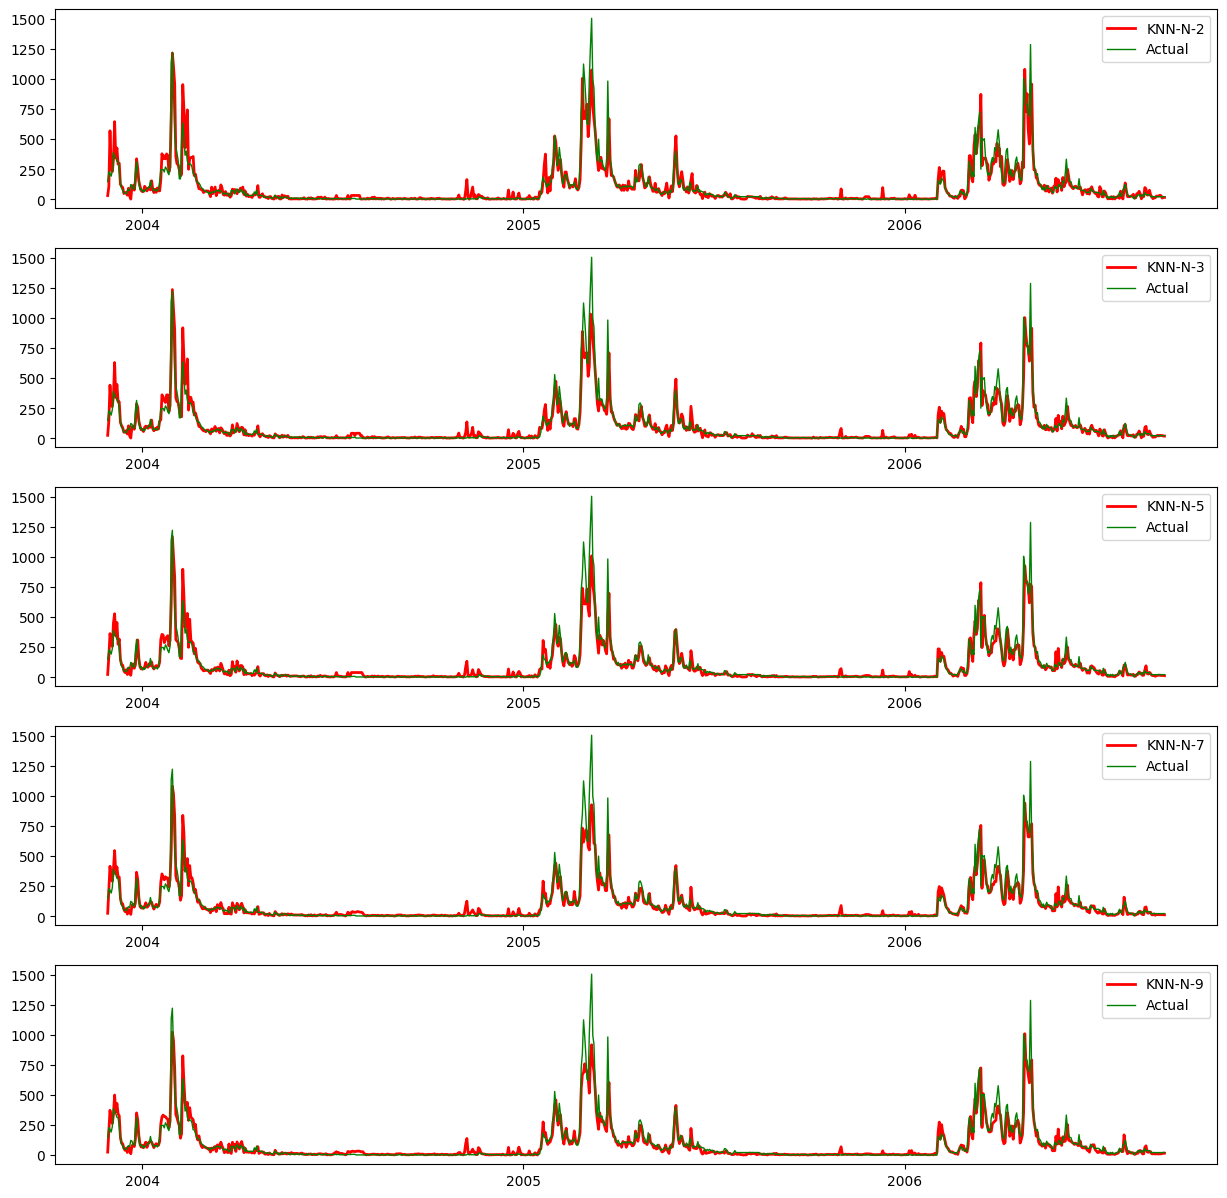

In [154]:
fig,ax = plt.subplots(5,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(p_knn_1,"red",label='KNN-N-2',linewidth=2.0)
ax[0].plot(r_knn_1,"green",label='Actual',linewidth=1.0)
ax[0].legend()
ax[1].plot(p_knn_2,"red",label='KNN-N-3',linewidth=2.0)
ax[1].plot(r_knn_2,"green",label='Actual',linewidth=1.0)
ax[1].legend()
ax[2].plot(p_knn_3,"red",label='KNN-N-5',linewidth=2.0)
ax[2].plot(r_knn_3,"green",label='Actual',linewidth=1.0)
ax[2].legend()
ax[3].plot(p_knn_4,"red",label='KNN-N-7',linewidth=2.0)
ax[3].plot(r_knn_4,"green",label='Actual',linewidth=1.0)
ax[3].legend()
ax[4].plot(p_knn_5,"red",label='KNN-N-9',linewidth=2.0)
ax[4].plot(r_knn_5,"green",label='Actual',linewidth=1.0)
ax[4].legend()
plt.show()

##LSTM

In [155]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import optimizers

In [156]:
x_lstm = X_pca.reshape(X_pca.shape[0],1,X_pca.shape[1])

In [200]:
# check if its running on gpu
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6017050230707488446
xla_global_id: -1
]


2023-05-12 04:26:55.682683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-12 04:26:55.684131: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


**Epoch 30**

In [160]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_30_rmse = []
score_30_corr = []
score_30_r2 = []
score_30_mae = []
score_30_apb = []
score_30_nse = []
score_30_kge = []
r_lstm_1 = []
p_lstm_1 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False,verbose= False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_1.extend(list(y_test['VALUE']))
    p_lstm_1.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_30_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_30_corr.append(correlation(y_test,yhat))
    score_30_r2.append(r2_score(y_test,yhat))
    score_30_mae.append(mean_absolute_error(y_test,yhat))
    score_30_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_30_nse.append(NS(y_test,yhat))
    score_30_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 7ms/step


k-fold:  33%|███▎      | 1/3 [01:54<03:49, 114.62s/it]

10/10 [==============================] - 0s 7ms/step


k-fold:  67%|██████▋   | 2/3 [03:46<01:53, 113.06s/it]

10/10 [==============================] - 0s 7ms/step


k-fold: 100%|██████████| 3/3 [04:27<00:00, 89.26s/it] 


In [161]:
# lstm_30 = pd.DataFrame({'actual':r_lstm_1,'predict':p_lstm_1})
# lstm_30.to_csv('lstm_30.csv')

In [162]:
print('RMSE ',mean(score_30_rmse))
print('CORR ',mean(score_30_corr))
print('R2 ',mean(score_30_r2))
print('MAE ',mean(score_30_mae))
print('APB ',mean(score_30_apb))
print('NSE ',mean(score_30_nse))
print('KGE ',mean(score_30_kge))

RMSE  59.58822096191153
CORR  0.9474841441765276
R2  0.8884964289340159
MAE  27.8707424855185
APB  26.31794946651692
NSE  0.8844790596217392
KGE  0.8813873798665224


**Epoch 40**

In [163]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_40_rmse = []
score_40_corr = []
score_40_r2 = []
score_40_mae = []
score_40_apb =[]
score_40_nse =[]
score_40_kge = []
r_lstm_2 = []
p_lstm_2 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_2.extend(list(y_test['VALUE']))
    p_lstm_2.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_40_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_40_corr.append(correlation(y_test,yhat))
    score_40_r2.append(r2_score(y_test,yhat))
    score_40_mae.append(mean_absolute_error(y_test,yhat))
    score_40_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_40_nse.append(NS(y_test,yhat))
    score_40_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 8ms/step


k-fold:  33%|███▎      | 1/3 [02:29<04:58, 149.28s/it]

10/10 [==============================] - 0s 7ms/step


k-fold:  67%|██████▋   | 2/3 [04:54<02:27, 147.08s/it]

10/10 [==============================] - 0s 7ms/step


k-fold: 100%|██████████| 3/3 [05:35<00:00, 111.89s/it]


In [164]:
lstm_40 = pd.DataFrame({'actual':r_lstm_2,'predict':p_lstm_2})
lstm_40.to_csv('lstm_40.csv')

In [165]:
print('RMSE ',mean(score_40_rmse))
print('CORR ',mean(score_40_corr))
print('R2 ',mean(score_40_r2))
print('MAE ',mean(score_40_mae))
print('APB ',mean(score_40_apb))
print('NSE ',mean(score_40_nse))
print('KGE ',mean(score_40_kge))

RMSE  58.92517702139788
CORR  0.9495946995223393
R2  0.8911179888613274
MAE  27.34622551285275
APB  25.860083136137288
NSE  0.8875670447154045
KGE  0.876875764456043


**Epoch 50**

In [166]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_50_rmse = []
score_50_corr = []
score_50_r2 = []
score_50_mae = []
score_50_apb =[]
score_50_nse =[]
score_50_kge = []
r_lstm_3 = []
p_lstm_3 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_3.extend(list(y_test['VALUE']))
    p_lstm_3.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_50_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_50_corr.append(correlation(y_test,yhat))
    score_50_r2.append(r2_score(y_test,yhat))
    score_50_mae.append(mean_absolute_error(y_test,yhat))
    score_50_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_50_nse.append(NS(y_test,yhat))
    score_50_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 7ms/step


k-fold:  33%|███▎      | 1/3 [03:10<06:21, 190.57s/it]

10/10 [==============================] - 0s 7ms/step


k-fold:  67%|██████▋   | 2/3 [06:17<03:08, 188.65s/it]

10/10 [==============================] - 0s 7ms/step


k-fold: 100%|██████████| 3/3 [06:58<00:00, 139.47s/it]


In [167]:
lstm_50 = pd.DataFrame({'actual':r_lstm_3,'predict':p_lstm_3})
lstm_50.to_csv('lstm_50.csv')

In [168]:
print('RMSE ',mean(score_50_rmse))
print('CORR ',mean(score_50_corr))
print('R2 ',mean(score_50_r2))
print('MAE ',mean(score_50_mae))
print('APB ',mean(score_50_apb))
print('NSE ',mean(score_50_nse))
print('KGE ',mean(score_50_kge))

RMSE  58.81957093635097
CORR  0.9506248906237408
R2  0.8913869830618958
MAE  27.17432878306599
APB  25.663051803303453
NSE  0.8887084463957693
KGE  0.8717695950131273


**Epoch 60**

In [169]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_60_rmse = []
score_60_corr = []
score_60_r2 = []
score_60_mae = []
score_60_apb =[]
score_60_nse = []
score_60_kge = []
r_lstm_4 = []
p_lstm_4 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=60, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_4.extend(list(y_test['VALUE']))
    p_lstm_4.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_60_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_60_corr.append(correlation(y_test,yhat))
    score_60_r2.append(r2_score(y_test,yhat))
    score_60_mae.append(mean_absolute_error(y_test,yhat))
    score_60_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_60_nse.append(NS(y_test,yhat))
    score_60_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 6ms/step


k-fold:  33%|███▎      | 1/3 [03:40<07:20, 220.25s/it]

10/10 [==============================] - 0s 5ms/step


k-fold:  67%|██████▋   | 2/3 [06:52<03:23, 203.92s/it]

10/10 [==============================] - 0s 6ms/step


k-fold: 100%|██████████| 3/3 [07:27<00:00, 149.32s/it]


In [170]:
lstm_60 = pd.DataFrame({'actual':r_lstm_4,'predict':p_lstm_4})
lstm_60.to_csv('lstm_60.csv')

In [171]:
print('RMSE ',mean(score_60_rmse))
print('CORR ',mean(score_60_corr))
print('R2 ',mean(score_60_r2))
print('MAE ',mean(score_60_mae))
print('APB ',mean(score_60_apb))
print('NSE ',mean(score_60_nse))
print('KGE ',mean(score_60_kge))

RMSE  58.76105840745377
CORR  0.9511981883236975
R2  0.8912280662525162
MAE  27.08487146890757
APB  25.599718832863637
NSE  0.8897238907212479
KGE  0.8696599651874951


**Epoch 70**

In [172]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512, activation='relu',return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024, activation='relu',return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_70_rmse = []
score_70_corr = []
score_70_r2 = []
score_70_mae = []
score_70_apb =[]
score_70_nse = []
score_70_kge = []
r_lstm_5 = []
p_lstm_5 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=70, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_5.extend(list(y_test['VALUE']))
    p_lstm_5.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_70_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_70_corr.append(correlation(y_test,yhat))
    score_70_r2.append(r2_score(y_test,yhat))
    score_70_mae.append(mean_absolute_error(y_test,yhat))
    score_70_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_70_nse.append(NS(y_test,yhat))
    score_70_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 5ms/step


k-fold:  33%|███▎      | 1/3 [03:46<07:33, 226.90s/it]

10/10 [==============================] - 0s 6ms/step


k-fold:  67%|██████▋   | 2/3 [07:31<03:45, 225.30s/it]

10/10 [==============================] - 0s 5ms/step


k-fold: 100%|██████████| 3/3 [11:14<00:00, 224.75s/it]


In [173]:
lstm_70 = pd.DataFrame({'actual':r_lstm_5,'predict':p_lstm_5})
lstm_70.to_csv('lstm_70.csv')

In [174]:
print('RMSE ',mean(score_70_rmse))
print('CORR ',mean(score_70_corr))
print('R2 ',mean(score_70_r2))
print('MAE ',mean(score_70_mae))
print('APB ',mean(score_70_apb))
print('NSE ',mean(score_70_nse))
print('KGE ',mean(score_70_kge))

RMSE  58.44731442155113
CORR  0.9517327934830776
R2  0.8922530470906248
MAE  26.14379957220243
APB  24.875735856227173
NSE  0.8893159813778461
KGE  0.8685655266217548


**Epoch 80**

In [175]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_80_rmse = []
score_80_corr = []
score_80_r2 = []
score_80_mae = []
score_80_apb =[]
score_80_nse =[]
score_80_kge = []
r_lstm_6 = []
p_lstm_6 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_6.extend(list(y_test['VALUE']))
    p_lstm_6.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_80_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_80_corr.append(correlation(y_test,yhat))
    score_80_r2.append(r2_score(y_test,yhat))
    score_80_mae.append(mean_absolute_error(y_test,yhat))
    score_80_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_80_nse.append(NS(y_test,yhat))
    score_80_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 5ms/step


k-fold:  33%|███▎      | 1/3 [04:18<08:37, 258.85s/it]

10/10 [==============================] - 0s 6ms/step


k-fold:  67%|██████▋   | 2/3 [08:34<04:16, 256.98s/it]

10/10 [==============================] - 0s 5ms/step


k-fold: 100%|██████████| 3/3 [12:49<00:00, 256.48s/it]


In [176]:
lstm_80 = pd.DataFrame({'actual':r_lstm_6,'predict':p_lstm_6})
lstm_80.to_csv('lstm_80.csv')

In [177]:
print('RMSE ',mean(score_80_rmse))
print('CORR ',mean(score_80_corr))
print('R2 ',mean(score_80_r2))
print('MAE ',mean(score_80_mae))
print('APB ',mean(score_80_apb))
print('NSE ',mean(score_80_nse))
print('KGE ',mean(score_80_kge))

RMSE  58.42960763143333
CORR  0.9519213632465678
R2  0.8921734565719887
MAE  26.073277243214452
APB  24.83964513222483
NSE  0.8893562368563572
KGE  0.8671578837178021


**Epoch 90**

In [178]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512,activation='relu', return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_90_rmse = []
score_90_corr = []
score_90_r2 = []
score_90_mae = []
score_90_apb =[]
score_90_nse =[]
score_90_kge = []
r_lstm_7 = []
p_lstm_7 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=90, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_7.extend(list(y_test['VALUE']))
    p_lstm_7.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_90_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_90_corr.append(correlation(y_test,yhat))
    score_90_r2.append(r2_score(y_test,yhat))
    score_90_mae.append(mean_absolute_error(y_test,yhat))
    score_90_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_90_nse.append(NS(y_test,yhat))
    score_90_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 5ms/step


/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.sum(np.abs(s-o))/np.sum(o))*100
/tmp/ipykernel_505129/620986548.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.std(s)/np.std(o)
/tmp/

10/10 [==============================] - 0s 5ms/step


/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.sum(np.abs(s-o))/np.sum(o))*100
/tmp/ipykernel_505129/620986548.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.std(s)/np.std(o)
/tmp/

10/10 [==============================] - 0s 6ms/step


/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.sum(np.abs(s-o))/np.sum(o))*100
/tmp/ipykernel_505129/620986548.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_505129/620986548.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.std(s)/np.std(o)
/tmp/

In [179]:
lstm_90 = pd.DataFrame({'actual':r_lstm_7,'predict':p_lstm_7})
lstm_90.to_csv('lstm_90.csv')

In [180]:
print('RMSE ',mean(score_90_rmse))
print('CORR ',mean(score_90_corr))
print('R2 ',mean(score_90_r2))
print('MAE ',mean(score_90_mae))
print('APB ',mean(score_90_apb))
print('NSE ',mean(score_90_nse))
print('KGE ',mean(score_90_kge))

RMSE  206.16554643042855
CORR  nan
R2  -0.31292443510404794
MAE  100.80029108508742
APB  inf
NSE  -inf
KGE  nan


**Epoch 100**

In [181]:
stop_noimprovement = EarlyStopping(monitor='loss', patience=10)
model = Sequential()
model.add(LSTM(units=512, activation='relu',return_sequences=True, input_shape=(1, x_lstm.shape[2])))
model.add(LSTM(units=1024,activation='relu', return_sequences=True))
model.add(Dense(units=1,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

kf = KFold(n_splits=3, shuffle=False)
score_100_rmse = []
score_100_corr = []
score_100_r2 = []
score_100_mae = []
score_100_apb =[]
score_100_nse = []
score_100_kge = []
r_lstm_8 = []
p_lstm_8 = []
for train_index, test_index in tqdm(kf.split(x_lstm),total=kf.get_n_splits(),desc="k-fold"):
    X_train, X_test, y_train, y_test = x_lstm[train_index], x_lstm[test_index], y.iloc[train_index], y.iloc[test_index]
    lstm_history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[stop_noimprovement], shuffle=False, verbose=False)
    yht = model.predict(X_test)
    yhat= []
    for i in yht:
      yhat.append(i[0][0])
    r_lstm_8.extend(list(y_test['VALUE']))
    p_lstm_8.extend(yhat)
    yhat = np.array(yhat)
    y_test = np.array(list(y_test['VALUE']))
    score_100_rmse.append(math.sqrt(mean_squared_error(y_test, yhat)))
    score_100_corr.append(correlation(y_test,yhat))
    score_100_r2.append(r2_score(y_test,yhat))
    score_100_mae.append(mean_absolute_error(y_test,yhat))
    score_100_apb.append(Absolute_Percentage_Error(y_test,yhat))
    score_100_nse.append(NS(y_test,yhat))
    score_100_kge.append(KGE(y_test,yhat))

k-fold:   0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 7ms/step


k-fold:  33%|███▎      | 1/3 [06:05<12:11, 365.52s/it]

10/10 [==============================] - 0s 7ms/step


k-fold:  67%|██████▋   | 2/3 [11:47<05:51, 351.73s/it]

10/10 [==============================] - 0s 8ms/step


k-fold: 100%|██████████| 3/3 [18:24<00:00, 368.06s/it]


In [182]:
lstm_100 = pd.DataFrame({'actual':r_lstm_8,'predict':p_lstm_8})
lstm_100.to_csv('lstm_100.csv')

In [183]:
print('RMSE ',mean(score_100_rmse))
print('CORR ',mean(score_100_corr))
print('R2 ',mean(score_100_r2))
print('MAE ',mean(score_100_mae))
print('APB ',mean(score_100_apb))
print('NSE ',mean(score_100_nse))
print('KGE ',mean(score_100_kge))

RMSE  59.25393457548302
CORR  0.950649816204437
R2  0.8887904660378829
MAE  26.001018131886752
APB  24.6937848618122
NSE  0.88596069493734
KGE  0.8604729405478617


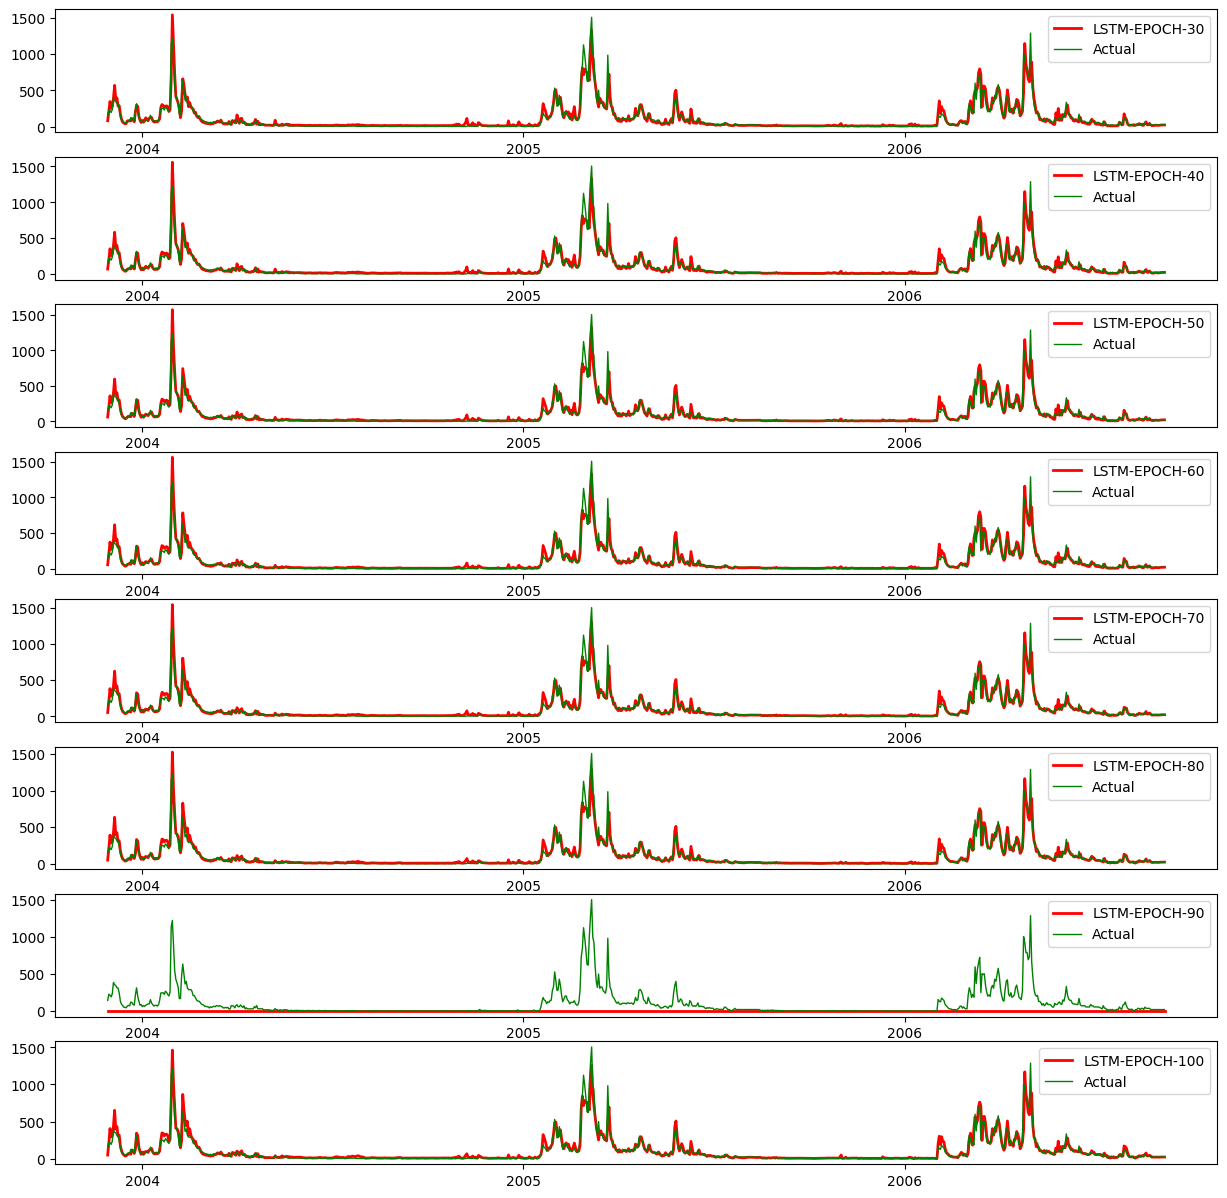

In [184]:
fig,ax = plt.subplots(8,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
ax[0].plot(p_lstm_1,"red",label='LSTM-EPOCH-30',linewidth=2.0)
ax[0].plot(r_lstm_1,"green",label='Actual',linewidth=1.0)
ax[0].legend()
ax[1].plot(p_lstm_2,"red",label='LSTM-EPOCH-40',linewidth=2.0)
ax[1].plot(r_lstm_2,"green",label='Actual',linewidth=1.0)
ax[1].legend()
ax[2].plot(p_lstm_3,"red",label='LSTM-EPOCH-50',linewidth=2.0)
ax[2].plot(r_lstm_3,"green",label='Actual',linewidth=1.0)
ax[2].legend()
ax[3].plot(p_lstm_4,"red",label='LSTM-EPOCH-60',linewidth=2.0)
ax[3].plot(r_lstm_4,"green",label='Actual',linewidth=1.0)
ax[3].legend()
ax[4].plot(p_lstm_5,"red",label='LSTM-EPOCH-70',linewidth=2.0)
ax[4].plot(r_lstm_5,"green",label='Actual',linewidth=1.0)
ax[4].legend()
ax[5].plot(p_lstm_6,"red",label='LSTM-EPOCH-80',linewidth=2.0)
ax[5].plot(r_lstm_6,"green",label='Actual',linewidth=1.0)
ax[5].legend()
ax[6].plot(p_lstm_7,"red",label='LSTM-EPOCH-90',linewidth=2.0)
ax[6].plot(r_lstm_7,"green",label='Actual',linewidth=1.0)
ax[6].legend()
ax[7].plot(p_lstm_8,"red",label='LSTM-EPOCH-100',linewidth=2.0)
ax[7].plot(r_lstm_8,"green",label='Actual',linewidth=1.0)
ax[7].legend()
plt.show()

##Ensemble

In [185]:
scores = [mean(score_rf_50),mean(def_gbr_score2),mean(knn_3_rmse),mean(score_30_rmse)]
ranking = 1 + argsort(argsort(scores))
ranking

array([2, 3, 4, 1])

#Weighted voting

In [186]:
rfproba = [ele*1 for ele in p_rf_1]
gbrproba = [ele*3 for ele in p_gbr_3]
knnproba = [ele*2 for ele in p_knn_2]
lstmproba = [ele*4 for ele in p_lstm_1]
pred = [] 
for i in range(len(p_rf_1)):
  pred.append((rfproba[i]+gbrproba[i]+knnproba[i]+lstmproba[i])/10)
predensemble = np.array(pred).reshape(len(pred))
realarr = np.array(r_gbr_3)

In [187]:
print('RMSE ',math.sqrt(mean_squared_error(predensemble, realarr)))
print('CORR ',correlation(predensemble,realarr))
print('MAE ',mean_absolute_error(predensemble, realarr))
print('R2 ',r2_score(predensemble, realarr))
print('APB ',Absolute_Percentage_Error(predensemble, realarr))
print('NSE ',NS(predensemble, realarr))
print('KGE ',KGE(predensemble, realarr))

RMSE  61.458380990515984
CORR  0.9418611919816351
MAE  25.67760758802383
R2  0.867715679672696
APB  25.480658136854718
NSE  0.8867884089297838
KGE  0.9046121049819295


#Equal voting

In [188]:
rfproba = [ele*1 for ele in p_rf_1]
gbrproba = [ele*1 for ele in p_gbr_3]
knnproba = [ele*1 for ele in p_knn_2]
lstmproba = [ele*1 for ele in p_lstm_1]
pred = [] 
for i in range(len(p_rf_1)):
  pred.append((rfproba[i]+gbrproba[i]+knnproba[i]+lstmproba[i])/4)
predensemble = np.array(pred).reshape(len(pred))
realarr = np.array(r_gbr_3)

In [189]:
print('RMSE ',math.sqrt(mean_squared_error(predensemble, realarr)))
print('CORR ',correlation(predensemble,realarr))
print('MAE ',mean_absolute_error(predensemble, realarr))
print('R2 ',r2_score(predensemble, realarr))
print('APB ',Absolute_Percentage_Error(predensemble, realarr))
print('NSE ',NS(predensemble, realarr))
print('KGE ',KGE(predensemble, realarr))

RMSE  62.649940898933515
CORR  0.9396249125853142
MAE  25.49866674015453
R2  0.8599175114234275
APB  25.303089780626575
NSE  0.8823559425614154
KGE  0.8968851488441676


##Best Figures

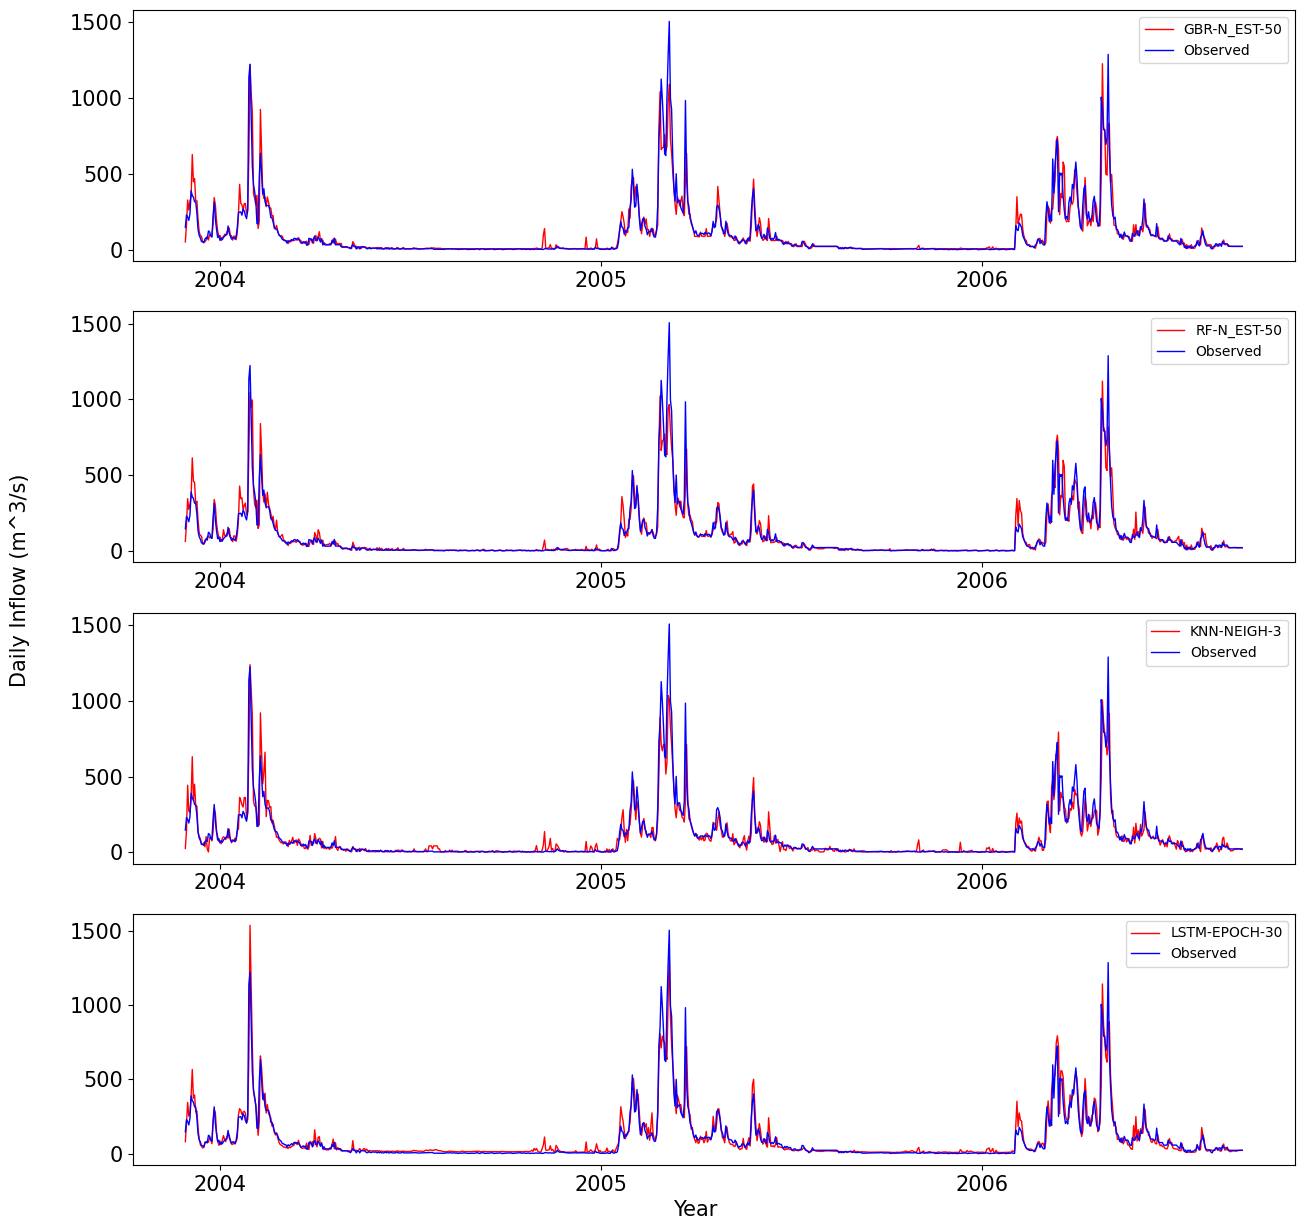

In [190]:
fig,ax = plt.subplots(4,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,960,step=330),xticklabels=['2004','2005','2006'])
fig.text(0.5, 0.08, 'Year', ha='center', va='center',fontsize=15)
fig.text(0.05, 0.5, 'Daily Inflow (m^3/s)', ha='center', va='center', rotation='vertical',fontsize=15)
ax[0].plot(p_gbr_3,"red",label='GBR-N_EST-50',linewidth=1.0)
ax[0].plot(r_gbr_3,"blue",label='Observed',linewidth=1.0)
ax[0].legend(prop={'size': 10})
ax[0].tick_params(axis='x', labelsize= 15)
ax[0].tick_params(axis='y', labelsize= 15)
ax[1].plot(p_rf_1,"red",label='RF-N_EST-50',linewidth=1.0)
ax[1].plot(r_rf_1,"blue",label='Observed',linewidth=1.0)
ax[1].legend(prop={'size': 10})
ax[1].tick_params(axis='x', labelsize= 15)
ax[1].tick_params(axis='y', labelsize= 15)
ax[2].plot(p_knn_2,"red",label='KNN-NEIGH-3',linewidth=1.0)
ax[2].plot(r_knn_2,"blue",label='Observed',linewidth=1.0)
ax[2].legend(prop={'size': 10})
ax[2].tick_params(axis='x', labelsize= 15)
ax[2].tick_params(axis='y', labelsize= 15)
ax[3].plot(p_lstm_1,"red",label='LSTM-EPOCH-30',linewidth=1.0)
ax[3].plot(r_lstm_1,"blue",label='Observed',linewidth=1.0)
ax[3].legend(prop={'size': 10})
ax[3].tick_params(axis='x', labelsize= 15)
ax[3].tick_params(axis='y', labelsize= 15)
# plt.tight_layout()
plt.savefig('9.png')

##Experiments


In [194]:
gbr_100 = pd.read_csv('./gbr_100.csv')
gbr_200 = pd.read_csv('./gbr_200.csv')
gbr_30 = pd.read_csv('./gbr_30.csv')
gbr_300 = pd.read_csv('./gbr_300.csv')
gbr_40 = pd.read_csv('./gbr_40.csv')
# gbr_400 = pd.read_csv('./gbr_400.csv')
gbr_50 = pd.read_csv('./gbr_50.csv')
# gbr_500 = pd.read_csv('./gbr_500.csv')
knn_2 = pd.read_csv('./knn_2.csv')
knn_3 = pd.read_csv('./knn_3.csv')
knn_5 = pd.read_csv('./knn_5.csv')
knn_7 = pd.read_csv('./knn_7.csv')
knn_9 = pd.read_csv('./knn_9.csv')
lstm_100 = pd.read_csv('./lstm_100.csv')
# lstm_30 = pd.read_csv('./lstm_30.csv')
lstm_40 = pd.read_csv('./lstm_40.csv')
lstm_50 = pd.read_csv('./lstm_50.csv')
lstm_60 = pd.read_csv('./lstm_60.csv')
lstm_70 = pd.read_csv('./lstm_70.csv')
lstm_80 = pd.read_csv('./lstm_80.csv')
lstm_90 = pd.read_csv('./lstm_90.csv')
rf_100 = pd.read_csv('./rf_100.csv')
rf_200 = pd.read_csv('./rf_200.csv')
rf_300 = pd.read_csv('./rf_300.csv')
rf_400 = pd.read_csv('./rf_400.csv')
rf_50 = pd.read_csv('./rf_50.csv')
rf_500 = pd.read_csv('./rf_500.csv')

## Monthly Comparison

##GBR

In [ ]:
a_gbr_30 = []
p_gbr_30 = []
a_gbr_40 = []
p_gbr_40 = []
a_gbr_50 = []
p_gbr_50 = []
a_gbr_100 = []
p_gbr_100 = []
a_gbr_200 = []
p_gbr_200 = []
a_gbr_300 = []
p_gbr_300 = []
a_gbr_400 = []
p_gbr_400 = []
a_gbr_500 = []
p_gbr_500 = []
for i in range(0,900,30):
  a_gbr_30.append(sum(list(gbr_30['actual'])[i:i+30]))
  p_gbr_30.append(sum(list(gbr_30['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_40.append(sum(list(gbr_40['actual'])[i:i+30]))
  p_gbr_40.append(sum(list(gbr_40['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_50.append(sum(list(gbr_50['actual'])[i:i+30]))
  p_gbr_50.append(sum(list(gbr_50['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_100.append(sum(list(gbr_100['actual'])[i:i+30]))
  p_gbr_100.append(sum(list(gbr_100['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_200.append(sum(list(gbr_200['actual'])[i:i+30]))
  p_gbr_200.append(sum(list(gbr_200['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_300.append(sum(list(gbr_300['actual'])[i:i+30]))
  p_gbr_300.append(sum(list(gbr_300['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_400.append(sum(list(gbr_400['actual'])[i:i+30]))
  p_gbr_400.append(sum(list(gbr_400['predict'])[i:i+30]))

for i in range(0,900,30):
  a_gbr_500.append(sum(list(gbr_500['actual'])[i:i+30]))
  p_gbr_500.append(sum(list(gbr_500['predict'])[i:i+30]))

print(math.sqrt(mean_squared_error(a_gbr_30, p_gbr_30)))
print(math.sqrt(mean_squared_error(a_gbr_40, p_gbr_40)))
print(math.sqrt(mean_squared_error(a_gbr_50, p_gbr_50)))
print(math.sqrt(mean_squared_error(a_gbr_100, p_gbr_100)))
print(math.sqrt(mean_squared_error(a_gbr_200, p_gbr_200)))
print(math.sqrt(mean_squared_error(a_gbr_300, p_gbr_300)))
print(math.sqrt(mean_squared_error(a_gbr_400, p_gbr_400)))
print(math.sqrt(mean_squared_error(a_gbr_500, p_gbr_500)))

2509.0901789436284
2410.072944652567
2343.8317620345806
2172.0224571399517
2032.227820015756
1954.370273839435
1900.9326412403684
1841.8671607525755


##KNN

In [ ]:
a_knn_2 = []
p_knn_2 = []
a_knn_3 = []
p_knn_3 = []
a_knn_5 = []
p_knn_5 = []
a_knn_7 = []
p_knn_7 = []
a_knn_9 = []
p_knn_9 = []
for i in range(0,900,30):
  a_knn_2.append(sum(list(knn_2['actual'])[i:i+30]))
  p_knn_2.append(sum(list(knn_2['predict'])[i:i+30]))

for i in range(0,900,30):
  a_knn_3.append(sum(list(knn_3['actual'])[i:i+30]))
  p_knn_3.append(sum(list(knn_3['predict'])[i:i+30]))

for i in range(0,900,30):
  a_knn_5.append(sum(list(knn_5['actual'])[i:i+30]))
  p_knn_5.append(sum(list(knn_5['predict'])[i:i+30]))

for i in range(0,900,30):
  a_knn_7.append(sum(list(knn_7['actual'])[i:i+30]))
  p_knn_7.append(sum(list(knn_7['predict'])[i:i+30]))

for i in range(0,900,30):
  a_knn_9.append(sum(list(knn_9['actual'])[i:i+30]))
  p_knn_9.append(sum(list(knn_9['predict'])[i:i+30]))

print(math.sqrt(mean_squared_error(a_knn_2, p_knn_2)))
print(math.sqrt(mean_squared_error(a_knn_3, p_knn_3)))
print(math.sqrt(mean_squared_error(a_knn_5, p_knn_5)))
print(math.sqrt(mean_squared_error(a_knn_7, p_knn_7)))
print(math.sqrt(mean_squared_error(a_knn_9, p_knn_9)))

1672.2235390297058
1653.0103067327814
1600.0068269396345
1616.805371289046
1671.2561560098045


##LSTM

In [ ]:
a_lstm_30 = []
p_lstm_30 = []
a_lstm_40 = []
p_lstm_40 = []
a_lstm_50 = []
p_lstm_50 = []
a_lstm_60 = []
p_lstm_60 = []
a_lstm_70 = []
p_lstm_70 = []
a_lstm_80 = []
p_lstm_80 = []
a_lstm_90 = []
p_lstm_90 = []
a_lstm_100 = []
p_lstm_100 = []

for i in range(0,900,30):
  a_lstm_30.append(sum(list(lstm_30['actual'])[i:i+30]))
  p_lstm_30.append(sum(list(lstm_30['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_40.append(sum(list(lstm_40['actual'])[i:i+30]))
  p_lstm_40.append(sum(list(lstm_40['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_50.append(sum(list(lstm_50['actual'])[i:i+30]))
  p_lstm_50.append(sum(list(lstm_50['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_60.append(sum(list(lstm_60['actual'])[i:i+30]))
  p_lstm_60.append(sum(list(lstm_60['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_70.append(sum(list(lstm_70['actual'])[i:i+30]))
  p_lstm_70.append(sum(list(lstm_70['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_80.append(sum(list(lstm_80['actual'])[i:i+30]))
  p_lstm_80.append(sum(list(lstm_80['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_90.append(sum(list(lstm_90['actual'])[i:i+30]))
  p_lstm_90.append(sum(list(lstm_90['predict'])[i:i+30]))

for i in range(0,900,30):
  a_lstm_100.append(sum(list(lstm_100['actual'])[i:i+30]))
  p_lstm_100.append(sum(list(lstm_100['predict'])[i:i+30]))

print(math.sqrt(mean_squared_error(a_lstm_30, p_lstm_30)))
print(math.sqrt(mean_squared_error(a_lstm_40, p_lstm_40)))
print(math.sqrt(mean_squared_error(a_lstm_50, p_lstm_50)))
print(math.sqrt(mean_squared_error(a_lstm_60, p_lstm_60)))
print(math.sqrt(mean_squared_error(a_lstm_70, p_lstm_70)))
print(math.sqrt(mean_squared_error(a_lstm_80, p_lstm_80)))
print(math.sqrt(mean_squared_error(a_lstm_90, p_lstm_90)))
print(math.sqrt(mean_squared_error(a_lstm_100, p_lstm_100)))

1416.643448206216
1216.5384486155397
1342.9984980577633
1290.5033808777675
1234.3642610755758
1700.0213993702891
888.0881291797906
1527.1988921743493


##RF

In [ ]:
a_rf_50 = []
p_rf_50 = []
a_rf_100 = []
p_rf_100 = []
a_rf_200 = []
p_rf_200 = []
a_rf_300 = []
p_rf_300 = []
a_rf_400 = []
p_rf_400 = []
a_rf_500 = []
p_rf_500 = []

for i in range(0,900,30):
  a_rf_50.append(sum(list(rf_50['actual'])[i:i+30]))
  p_rf_50.append(sum(list(rf_50['predict'])[i:i+30]))

for i in range(0,900,30):
  a_rf_100.append(sum(list(rf_100['actual'])[i:i+30]))
  p_rf_100.append(sum(list(rf_100['predict'])[i:i+30]))

for i in range(0,900,30):
  a_rf_200.append(sum(list(rf_200['actual'])[i:i+30]))
  p_rf_200.append(sum(list(rf_200['predict'])[i:i+30]))

for i in range(0,900,30):
  a_rf_300.append(sum(list(rf_300['actual'])[i:i+30]))
  p_rf_300.append(sum(list(rf_300['predict'])[i:i+30]))

for i in range(0,900,30):
  a_rf_400.append(sum(list(rf_400['actual'])[i:i+30]))
  p_rf_400.append(sum(list(rf_400['predict'])[i:i+30]))

for i in range(0,900,30):
  a_rf_500.append(sum(list(rf_500['actual'])[i:i+30]))
  p_rf_500.append(sum(list(rf_500['predict'])[i:i+30]))

print(math.sqrt(mean_squared_error(a_rf_50, p_rf_50)))
print(math.sqrt(mean_squared_error(a_rf_100, p_rf_100)))
print(math.sqrt(mean_squared_error(a_rf_200, p_rf_200)))
print(math.sqrt(mean_squared_error(a_rf_300, p_rf_300)))
print(math.sqrt(mean_squared_error(a_rf_400, p_rf_400)))
print(math.sqrt(mean_squared_error(a_rf_500, p_rf_500)))

2267.549470969631
2335.128102259172
2278.858252235606
2288.1312989721955
2261.1470529111057
2286.3561218517298


##Monsoon

##GBR

In [ ]:
a_gbr_30 = []
p_gbr_30 = []
# a_gbr_40 = []
# p_gbr_40 = []
# a_gbr_50 = []
# p_gbr_50 = []
# a_gbr_100 = []
# p_gbr_100 = []
# a_gbr_200 = []
# p_gbr_200 = []
# a_gbr_300 = []
# p_gbr_300 = []
# a_gbr_400 = []
# p_gbr_400 = []
# a_gbr_500 = []
# p_gbr_500 = []

a_gbr_30.extend(r_gbr_3[:113])
p_gbr_30.extend(p_gbr_3[:113])
for i in range(358,924,365):
  a_gbr_30.extend(r_gbr_3[i:i+120])
  p_gbr_30.extend(p_gbr_3[i:i+120])

# a_gbr_40.extend(list(gbr_40['actual'])[:113])
# p_gbr_40.extend(list(gbr_40['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_40.extend(list(gbr_40['actual'])[i:i+120])
#   p_gbr_40.extend(list(gbr_40['predict'])[i:i+120])

# a_gbr_50.extend(list(gbr_50['actual'])[:113])
# p_gbr_50.extend(list(gbr_50['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_50.extend(list(gbr_50['actual'])[i:i+120])
#   p_gbr_50.extend(list(gbr_50['predict'])[i:i+120])

# a_gbr_100.extend(list(gbr_100['actual'])[:113])
# p_gbr_100.extend(list(gbr_100['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_100.extend(list(gbr_100['actual'])[i:i+120])
#   p_gbr_100.extend(list(gbr_100['predict'])[i:i+120])

# a_gbr_200.extend(list(gbr_200['actual'])[:113])
# p_gbr_200.extend(list(gbr_200['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_200.extend(list(gbr_200['actual'])[i:i+120])
#   p_gbr_200.extend(list(gbr_200['predict'])[i:i+120])

# a_gbr_300.extend(list(gbr_300['actual'])[:113])
# p_gbr_300.extend(list(gbr_300['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_300.extend(list(gbr_300['actual'])[i:i+120])
#   p_gbr_300.extend(list(gbr_300['predict'])[i:i+120])

# a_gbr_400.extend(list(gbr_400['actual'])[:113])
# p_gbr_400.extend(list(gbr_400['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_400.extend(list(gbr_400['actual'])[i:i+120])
#   p_gbr_400.extend(list(gbr_400['predict'])[i:i+120])

# a_gbr_500.extend(list(gbr_500['actual'])[:113])
# p_gbr_500.extend(list(gbr_500['predict'])[:113])
# for i in range(358,924,365):
#   a_gbr_500.extend(list(gbr_500['actual'])[i:i+120])
#   p_gbr_500.extend(list(gbr_500['predict'])[i:i+120])

# print(math.sqrt(mean_squared_error(a_gbr_30, p_gbr_30)))
# print(math.sqrt(mean_squared_error(a_gbr_40, p_gbr_40)))
# print(math.sqrt(mean_squared_error(a_gbr_50, p_gbr_50)))
# print(math.sqrt(mean_squared_error(a_gbr_100, p_gbr_100)))
# print(math.sqrt(mean_squared_error(a_gbr_200, p_gbr_200)))
# print(math.sqrt(mean_squared_error(a_gbr_300, p_gbr_300)))
# print(math.sqrt(mean_squared_error(a_gbr_400, p_gbr_400)))
# print(math.sqrt(mean_squared_error(a_gbr_500, p_gbr_500)))

In [ ]:
gbr = pd.DataFrame({'actual':a_gbr_500,'predict':p_gbr_500})
gbr.to_csv('gbr_500_monsoon.csv')

##RF

In [ ]:
a_rf_50 = []
p_rf_50 = []
# a_rf_100 = []
# p_rf_100 = []
# a_rf_200 = []
# p_rf_200 = []
# a_rf_300 = []
# p_rf_300 = []
# a_rf_400 = []
# p_rf_400 = []
# a_rf_500 = []
# p_rf_500 = []

a_rf_50.extend(r_rf_1[:113])
p_rf_50.extend(p_rf_1[:113])
for i in range(358,924,365):
  a_rf_50.extend(r_rf_1[i:i+120])
  p_rf_50.extend(p_rf_1[i:i+120])

# a_rf_100.extend(list(rf_100['actual'])[:113])
# p_rf_100.extend(list(rf_100['predict'])[:113])
# for i in range(358,924,365):
#   a_rf_100.extend(list(rf_100['actual'])[i:i+120])
#   p_rf_100.extend(list(rf_100['predict'])[i:i+120])

# a_rf_200.extend(list(rf_200['actual'])[:113])
# p_rf_200.extend(list(rf_200['predict'])[:113])
# for i in range(358,924,365):
#   a_rf_200.extend(list(rf_200['actual'])[i:i+120])
#   p_rf_200.extend(list(rf_200['predict'])[i:i+120])

# a_rf_300.extend(list(rf_300['actual'])[:113])
# p_rf_300.extend(list(rf_300['predict'])[:113])
# for i in range(358,924,365):
#   a_rf_300.extend(list(rf_300['actual'])[i:i+120])
#   p_rf_300.extend(list(rf_300['predict'])[i:i+120])

# a_rf_400.extend(list(rf_400['actual'])[:113])
# p_rf_400.extend(list(rf_400['predict'])[:113])
# for i in range(358,924,365):
#   a_rf_400.extend(list(rf_400['actual'])[i:i+120])
#   p_rf_400.extend(list(rf_400['predict'])[i:i+120])

# a_rf_500.extend(list(rf_500['actual'])[:113])
# p_rf_500.extend(list(rf_500['predict'])[:113])
# for i in range(358,924,365):
#   a_rf_500.extend(list(rf_500['actual'])[i:i+120])
#   p_rf_500.extend(list(rf_500['predict'])[i:i+120])

# print(math.sqrt(mean_squared_error(a_rf_50, p_rf_50)))
# print(math.sqrt(mean_squared_error(a_rf_100, p_rf_100)))
# print(math.sqrt(mean_squared_error(a_rf_200, p_rf_200)))
# print(math.sqrt(mean_squared_error(a_rf_300, p_rf_300)))
# print(math.sqrt(mean_squared_error(a_rf_400, p_rf_400)))
# print(math.sqrt(mean_squared_error(a_rf_500, p_rf_500)))

In [ ]:
rf = pd.DataFrame({'actual':a_rf_400,'predict':p_rf_400})
rf.to_csv('rf_400_monsoon.csv')

##KNN

In [ ]:
# a_knn_2 = []
# p_knn_2 = []
a_knn_3 = []
p_knn_3 = []
# a_knn_5 = []
# p_knn_5 = []
# a_knn_7 = []
# p_knn_7 = []
# a_knn_9 = []
# p_knn_9 = []

# a_knn_2.extend(list(knn_2['actual'])[:113])
# p_knn_2.extend(list(knn_2['predict'])[:113])
# for i in range(358,924,365):
#   a_knn_2.extend(list(knn_2['actual'])[i:i+120])
#   p_knn_2.extend(list(knn_2['predict'])[i:i+120])

a_knn_3.extend(r_knn_2[:113])
p_knn_3.extend(p_knn_2[:113])
for i in range(358,924,365):
  a_knn_3.extend(r_knn_2[i:i+120])
  p_knn_3.extend(p_knn_2[i:i+120])

# a_knn_5.extend(list(knn_5['actual'])[:113])
# p_knn_5.extend(list(knn_5['predict'])[:113])
# for i in range(358,924,365):
#   a_knn_5.extend(list(knn_5['actual'])[i:i+120])
#   p_knn_5.extend(list(knn_5['predict'])[i:i+120])

# a_knn_7.extend(list(knn_7['actual'])[:113])
# p_knn_7.extend(list(knn_7['predict'])[:113])
# for i in range(358,924,365):
#   a_knn_7.extend(list(knn_7['actual'])[i:i+120])
#   p_knn_7.extend(list(knn_7['predict'])[i:i+120])

# a_knn_9.extend(list(knn_9['actual'])[:113])
# p_knn_9.extend(list(knn_9['predict'])[:113])
# for i in range(358,924,365):
#   a_knn_9.extend(list(knn_9['actual'])[i:i+120])
#   p_knn_9.extend(list(knn_9['predict'])[i:i+120])

# print(math.sqrt(mean_squared_error(a_knn_2, p_knn_2)))
# print(math.sqrt(mean_squared_error(a_knn_3, p_knn_3)))
# print(math.sqrt(mean_squared_error(a_knn_5, p_knn_5)))
# print(math.sqrt(mean_squared_error(a_knn_7, p_knn_7)))
# print(math.sqrt(mean_squared_error(a_knn_9, p_knn_9)))

In [ ]:
knn = pd.DataFrame({'actual':a_knn_9,'predict':p_knn_9})
knn.to_csv('knn_9_monsoon.csv')

##LSTM

In [ ]:
a_lstm_30 = []
p_lstm_30 = []
# a_lstm_40 = []
# p_lstm_40 = []
# a_lstm_50 = []
# p_lstm_50 = []
# a_lstm_60 = []
# p_lstm_60 = []
# a_lstm_70 = []
# p_lstm_70 = []
# a_lstm_80 = []
# p_lstm_80 = []
# a_lstm_90 = []
# p_lstm_90 = []
# a_lstm_100 = []
# p_lstm_100 = []

a_lstm_30.extend(r_lstm_1[:113])
p_lstm_30.extend(p_lstm_1[:113])
for i in range(358,924,365):
  a_lstm_30.extend(r_lstm_1[i:i+120])
  p_lstm_30.extend(p_lstm_1[i:i+120])

# a_lstm_40.extend(list(lstm_40['actual'])[:113])
# p_lstm_40.extend(list(lstm_40['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_40.extend(list(lstm_40['actual'])[i:i+120])
#   p_lstm_40.extend(list(lstm_40['predict'])[i:i+120])

# a_lstm_50.extend(list(lstm_50['actual'])[:113])
# p_lstm_50.extend(list(lstm_50['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_50.extend(list(lstm_50['actual'])[i:i+120])
#   p_lstm_50.extend(list(lstm_50['predict'])[i:i+120])

# a_lstm_60.extend(list(lstm_60['actual'])[:113])
# p_lstm_60.extend(list(lstm_60['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_60.extend(list(lstm_60['actual'])[i:i+120])
#   p_lstm_60.extend(list(lstm_60['predict'])[i:i+120])

# a_lstm_70.extend(list(lstm_70['actual'])[:113])
# p_lstm_70.extend(list(lstm_70['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_70.extend(list(lstm_70['actual'])[i:i+120])
#   p_lstm_70.extend(list(lstm_70['predict'])[i:i+120])

# a_lstm_80.extend(list(lstm_80['actual'])[:113])
# p_lstm_80.extend(list(lstm_80['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_80.extend(list(lstm_80['actual'])[i:i+120])
#   p_lstm_80.extend(list(lstm_80['predict'])[i:i+120])

# a_lstm_90.extend(list(lstm_90['actual'])[:113])
# p_lstm_90.extend(list(lstm_90['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_90.extend(list(lstm_90['actual'])[i:i+120])
#   p_lstm_90.extend(list(lstm_90['predict'])[i:i+120])

# a_lstm_100.extend(list(lstm_100['actual'])[:113])
# p_lstm_100.extend(list(lstm_100['predict'])[:113])
# for i in range(358,924,365):
#   a_lstm_100.extend(list(lstm_100['actual'])[i:i+120])
#   p_lstm_100.extend(list(lstm_100['predict'])[i:i+120])

# print(math.sqrt(mean_squared_error(a_lstm_30, p_lstm_30)))
# print(math.sqrt(mean_squared_error(a_lstm_40, p_lstm_40)))
# print(math.sqrt(mean_squared_error(a_lstm_50, p_lstm_50)))
# print(math.sqrt(mean_squared_error(a_lstm_60, p_lstm_60)))
# print(math.sqrt(mean_squared_error(a_lstm_70, p_lstm_70)))
# print(math.sqrt(mean_squared_error(a_lstm_80, p_lstm_80)))
# print(math.sqrt(mean_squared_error(a_lstm_90, p_lstm_90)))
# print(math.sqrt(mean_squared_error(a_lstm_100, p_lstm_100)))

In [ ]:
lstm = pd.DataFrame({'actual':a_lstm_90,'predict':p_lstm_90})
lstm.to_csv('lstm_90_monsoon.csv')

In [ ]:
len(a_lstm_90)

353

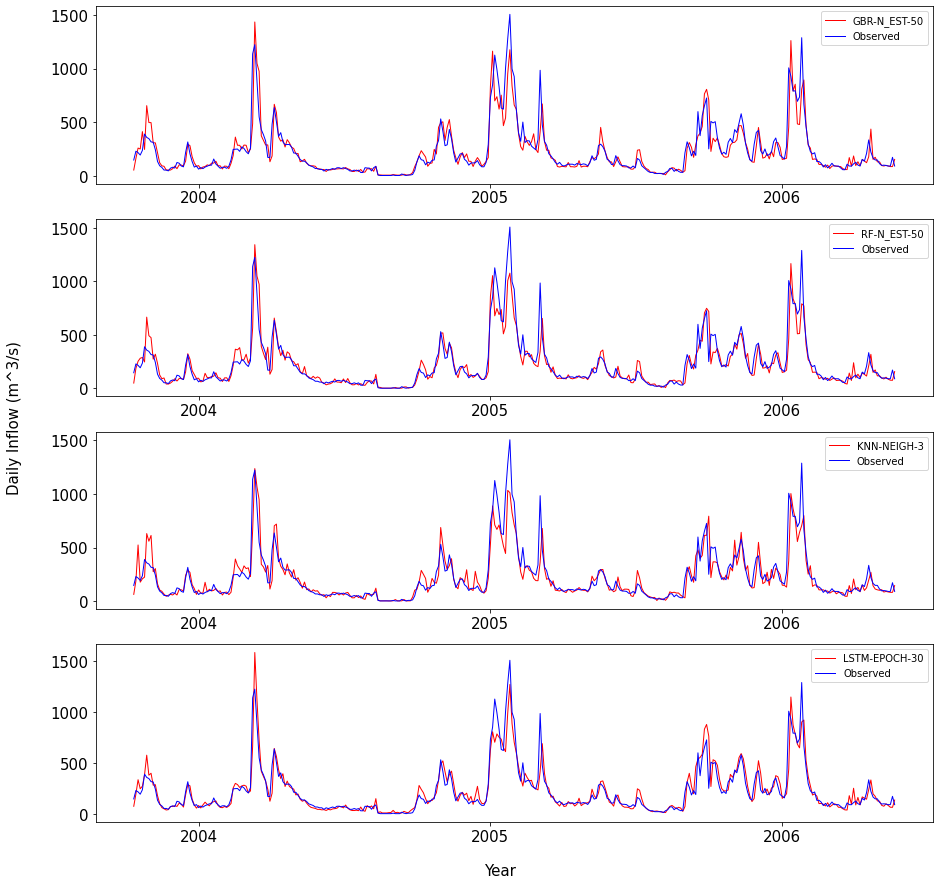

In [ ]:
fig,ax = plt.subplots(4,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,350,step=135),xticklabels=['2004','2005','2006'])
fig.text(0.5, 0.08, 'Year', ha='center', va='center',fontsize=15)
fig.text(0.05, 0.5, 'Daily Inflow (m^3/s)', ha='center', va='center', rotation='vertical',fontsize=15)
ax[0].plot(p_gbr_30,"red",label='GBR-N_EST-50',linewidth=1.0)
ax[0].plot(a_gbr_30,"blue",label='Observed',linewidth=1.0)
ax[0].legend(prop={'size': 10})
ax[0].tick_params(axis='x', labelsize= 15)
ax[0].tick_params(axis='y', labelsize= 15)
ax[1].plot(p_rf_50,"red",label='RF-N_EST-50',linewidth=1.0)
ax[1].plot(a_rf_50,"blue",label='Observed',linewidth=1.0)
ax[1].legend(prop={'size': 10})
ax[1].tick_params(axis='x', labelsize= 15)
ax[1].tick_params(axis='y', labelsize= 15)
ax[2].plot(p_knn_3,"red",label='KNN-NEIGH-3',linewidth=1.0)
ax[2].plot(a_knn_3,"blue",label='Observed',linewidth=1.0)
ax[2].legend(prop={'size': 10})
ax[2].tick_params(axis='x', labelsize= 15)
ax[2].tick_params(axis='y', labelsize= 15)
ax[3].plot(p_lstm_30,"red",label='LSTM-EPOCH-30',linewidth=1.0)
ax[3].plot(a_lstm_30,"blue",label='Observed',linewidth=1.0)
ax[3].legend(prop={'size': 10})
ax[3].tick_params(axis='x', labelsize= 15)
ax[3].tick_params(axis='y', labelsize= 15)
# plt.tight_layout()
plt.savefig('10a.png')

##Non Monsoon

##GBR

In [ ]:
a_gbr_30 = []
p_gbr_30 = []
# a_gbr_40 = []
# p_gbr_40 = []
# a_gbr_50 = []
# p_gbr_50 = []
# a_gbr_100 = []
# p_gbr_100 = []
# a_gbr_200 = []
# p_gbr_200 = []
# a_gbr_300 = []
# p_gbr_300 = []
# a_gbr_400 = []
# p_gbr_400 = []
# a_gbr_500 = []
# p_gbr_500 = []

for i in range(114,924,365):
  a_gbr_30.extend(r_gbr_3[i:i+240])
  p_gbr_30.extend(p_gbr_3[i:i+240])

# for i in range(114,924,365):
#   a_gbr_40.extend(list(gbr_40['actual'])[i:i+240])
#   p_gbr_40.extend(list(gbr_40['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_50.extend(list(gbr_50['actual'])[i:i+240])
#   p_gbr_50.extend(list(gbr_50['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_100.extend(list(gbr_100['actual'])[i:i+240])
#   p_gbr_100.extend(list(gbr_100['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_200.extend(list(gbr_200['actual'])[i:i+240])
#   p_gbr_200.extend(list(gbr_200['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_300.extend(list(gbr_300['actual'])[i:i+240])
#   p_gbr_300.extend(list(gbr_300['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_400.extend(list(gbr_400['actual'])[i:i+240])
#   p_gbr_400.extend(list(gbr_400['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_gbr_500.extend(list(gbr_500['actual'])[i:i+240])
#   p_gbr_500.extend(list(gbr_500['predict'])[i:i+240])

# print(math.sqrt(mean_squared_error(a_gbr_30, p_gbr_30)))
# print(math.sqrt(mean_squared_error(a_gbr_40, p_gbr_40)))
# print(math.sqrt(mean_squared_error(a_gbr_50, p_gbr_50)))
# print(math.sqrt(mean_squared_error(a_gbr_100, p_gbr_100)))
# print(math.sqrt(mean_squared_error(a_gbr_200, p_gbr_200)))
# print(math.sqrt(mean_squared_error(a_gbr_300, p_gbr_300)))
# print(math.sqrt(mean_squared_error(a_gbr_400, p_gbr_400)))
# print(math.sqrt(mean_squared_error(a_gbr_500, p_gbr_500)))

In [ ]:
gbr = pd.DataFrame({'actual':a_gbr_30,'predict':p_gbr_30})
gbr.to_csv('gbr_30_nonmonsoon.csv')

##RF

In [ ]:
a_rf_50 = []
p_rf_50 = []
# a_rf_100 = []
# p_rf_100 = []
# a_rf_200 = []
# p_rf_200 = []
# a_rf_300 = []
# p_rf_300 = []
# a_rf_400 = []
# p_rf_400 = []
# a_rf_500 = []
# p_rf_500 = []

for i in range(114,924,365):
  a_rf_50.extend(r_rf_1[i:i+240])
  p_rf_50.extend(p_rf_1[i:i+240])

# for i in range(114,924,365):
#   a_rf_100.extend(list(rf_100['actual'])[i:i+240])
#   p_rf_100.extend(list(rf_100['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_rf_200.extend(list(rf_200['actual'])[i:i+240])
#   p_rf_200.extend(list(rf_200['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_rf_300.extend(list(rf_300['actual'])[i:i+240])
#   p_rf_300.extend(list(rf_300['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_rf_400.extend(list(rf_400['actual'])[i:i+240])
#   p_rf_400.extend(list(rf_400['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_rf_500.extend(list(rf_500['actual'])[i:i+240])
#   p_rf_500.extend(list(rf_500['predict'])[i:i+240])

# print(math.sqrt(mean_squared_error(a_rf_50, p_rf_50)))
# print(math.sqrt(mean_squared_error(a_rf_100, p_rf_100)))
# print(math.sqrt(mean_squared_error(a_rf_200, p_rf_200)))
# print(math.sqrt(mean_squared_error(a_rf_300, p_rf_300)))
# print(math.sqrt(mean_squared_error(a_rf_400, p_rf_400)))
# print(math.sqrt(mean_squared_error(a_rf_500, p_rf_500)))

In [ ]:
rf = pd.DataFrame({'actual':a_rf_50,'predict':p_rf_50})
rf.to_csv('rf_50_nonmonsoon.csv')

##KNN

In [ ]:
# a_knn_2 = []
# p_knn_2 = []
a_knn_3 = []
p_knn_3 = []
# a_knn_5 = []
# p_knn_5 = []
# a_knn_7 = []
# p_knn_7 = []
# a_knn_9 = []
# p_knn_9 = []

# for i in range(114,924,365):
#   a_knn_2.extend(list(knn_2['actual'])[i:i+240])
#   p_knn_2.extend(list(knn_2['predict'])[i:i+240])

for i in range(114,924,365):
  a_knn_3.extend(r_knn_2[i:i+240])
  p_knn_3.extend(p_knn_2[i:i+240])

# for i in range(114,924,365):
#   a_knn_5.extend(list(knn_5['actual'])[i:i+240])
#   p_knn_5.extend(list(knn_5['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_knn_7.extend(list(knn_7['actual'])[i:i+240])
#   p_knn_7.extend(list(knn_7['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_knn_9.extend(list(knn_9['actual'])[i:i+240])
#   p_knn_9.extend(list(knn_9['predict'])[i:i+240])

# print(math.sqrt(mean_squared_error(a_knn_2, p_knn_2)))
# print(math.sqrt(mean_squared_error(a_knn_3, p_knn_3)))
# print(math.sqrt(mean_squared_error(a_knn_5, p_knn_5)))
# print(math.sqrt(mean_squared_error(a_knn_7, p_knn_7)))
# print(math.sqrt(mean_squared_error(a_knn_9, p_knn_9)))

In [ ]:
knn = pd.DataFrame({'actual':a_knn_9,'predict':p_knn_9})
knn.to_csv('knn_9_nonmonsoon.csv')

##LSTM

In [ ]:
a_lstm_30 = []
p_lstm_30 = []
# a_lstm_40 = []
# p_lstm_40 = []
# a_lstm_50 = []
# p_lstm_50 = []
# a_lstm_60 = []
# p_lstm_60 = []
# a_lstm_70 = []
# p_lstm_70 = []
# a_lstm_80 = []
# p_lstm_80 = []
# a_lstm_90 = []
# p_lstm_90 = []
# a_lstm_100 = []
# p_lstm_100 = []

for i in range(114,924,365):
  a_lstm_30.extend(r_lstm_1[i:i+240])
  p_lstm_30.extend(p_lstm_1[i:i+240])

# for i in range(114,924,365):
#   a_lstm_40.extend(list(lstm_40['actual'])[i:i+240])
#   p_lstm_40.extend(list(lstm_40['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_50.extend(list(lstm_50['actual'])[i:i+240])
#   p_lstm_50.extend(list(lstm_50['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_60.extend(list(lstm_60['actual'])[i:i+240])
#   p_lstm_60.extend(list(lstm_60['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_70.extend(list(lstm_70['actual'])[i:i+240])
#   p_lstm_70.extend(list(lstm_70['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_80.extend(list(lstm_80['actual'])[i:i+240])
#   p_lstm_80.extend(list(lstm_80['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_90.extend(list(lstm_90['actual'])[i:i+240])
#   p_lstm_90.extend(list(lstm_90['predict'])[i:i+240])

# for i in range(114,924,365):
#   a_lstm_100.extend(list(lstm_100['actual'])[i:i+240])
#   p_lstm_100.extend(list(lstm_100['predict'])[i:i+240])

# print(math.sqrt(mean_squared_error(a_lstm_30, p_lstm_30)))
# print(math.sqrt(mean_squared_error(a_lstm_40, p_lstm_40)))
# print(math.sqrt(mean_squared_error(a_lstm_50, p_lstm_50)))
# print(math.sqrt(mean_squared_error(a_lstm_60, p_lstm_60)))
# print(math.sqrt(mean_squared_error(a_lstm_70, p_lstm_70)))
# print(math.sqrt(mean_squared_error(a_lstm_80, p_lstm_80)))
# print(math.sqrt(mean_squared_error(a_lstm_90, p_lstm_90)))
# print(math.sqrt(mean_squared_error(a_lstm_100, p_lstm_100)))

In [ ]:
lstm = pd.DataFrame({'actual':a_lstm_90,'predict':p_lstm_90})
lstm.to_csv('lstm_90_nonmonsoon.csv')

In [ ]:
len(a_lstm_90)

552

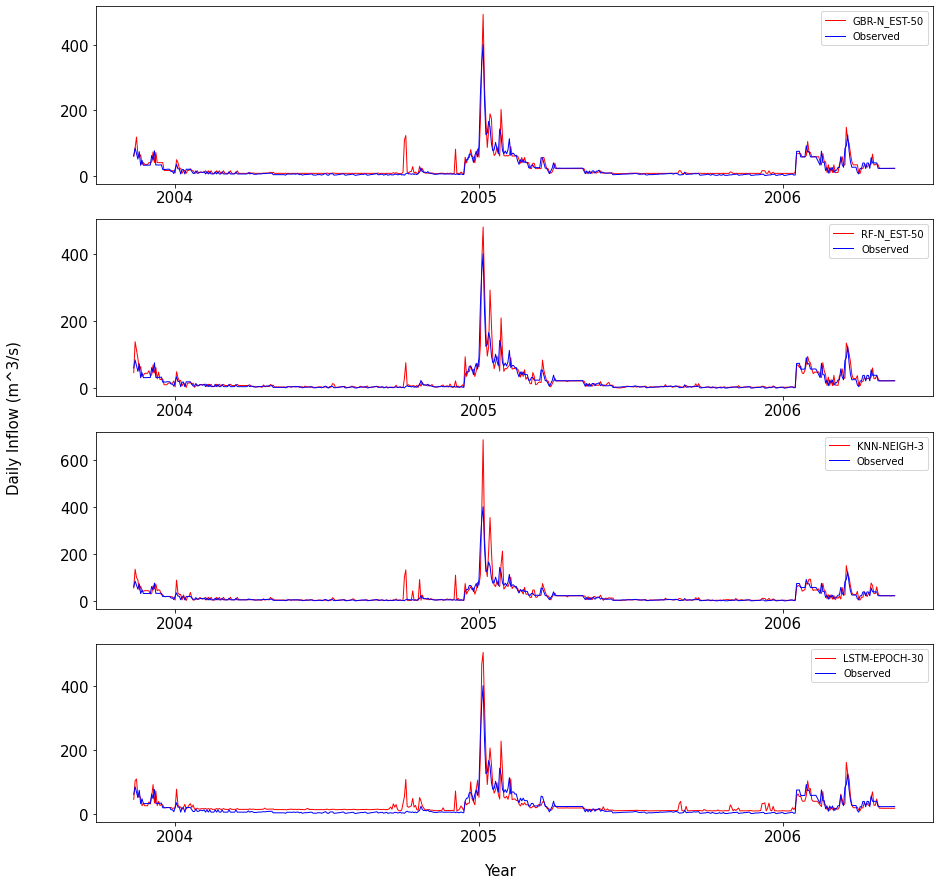

In [ ]:
fig,ax = plt.subplots(4,1,figsize=(15,15))
plt.setp(ax, xticks=np.arange(30,552,step=220),xticklabels=['2004','2005','2006'])
fig.text(0.5, 0.08, 'Year', ha='center', va='center',fontsize=15)
fig.text(0.05, 0.5, 'Daily Inflow (m^3/s)', ha='center', va='center', rotation='vertical',fontsize=15)
ax[0].plot(p_gbr_30,"red",label='GBR-N_EST-50',linewidth=1.0)
ax[0].plot(a_gbr_30,"blue",label='Observed',linewidth=1.0)
ax[0].legend(prop={'size': 10})
ax[0].tick_params(axis='x', labelsize= 15)
ax[0].tick_params(axis='y', labelsize= 15)
ax[1].plot(p_rf_50,"red",label='RF-N_EST-50',linewidth=1.0)
ax[1].plot(a_rf_50,"blue",label='Observed',linewidth=1.0)
ax[1].legend(prop={'size': 10})
ax[1].tick_params(axis='x', labelsize= 15)
ax[1].tick_params(axis='y', labelsize= 15)
ax[2].plot(p_knn_3,"red",label='KNN-NEIGH-3',linewidth=1.0)
ax[2].plot(a_knn_3,"blue",label='Observed',linewidth=1.0)
ax[2].legend(prop={'size': 10})
ax[2].tick_params(axis='x', labelsize= 15)
ax[2].tick_params(axis='y', labelsize= 15)
ax[3].plot(p_lstm_30,"red",label='LSTM-EPOCH-30',linewidth=1.0)
ax[3].plot(a_lstm_30,"blue",label='Observed',linewidth=1.0)
ax[3].legend(prop={'size': 10})
ax[3].tick_params(axis='x', labelsize= 15)
ax[3].tick_params(axis='y', labelsize= 15)
# plt.tight_layout()
plt.savefig('10b.png')